# Workshop: Data Visualization in R
The goal of this notebook is to introduce you to the essentials of creating clear and effective graphics in R. We will start with R’s base graphics and then move on to the powerful [`ggplot2`](https://r-graph-gallery.com/ggplot2-package.html) package, which is built on the [grammar of graphics](https://link.springer.com/book/10.1007/0-387-28695-0).
Along the way, you will learn:
- How to create common plots such as histograms, scatterplots, and bar charts
- How to map variables to visual properties like color, shape, and size
- How to adjust scales, themes, and layouts for clearer communication
- How to split figures into facets and combine multiple layers

By the end, you should feel comfortable using R to explore your data visually and to produce publication-quality graphics.

## Dataset  

In this workshop, we will work with the [**palmerpenguins**](https://allisonhorst.github.io/palmerpenguins/) dataset.  
It provides real biological measurements of three penguin species (*Adélie*, *Chinstrap*, and *Gentoo*) collected by Dr. Kristen Gorman and the Palmer Station Long Term Ecological Research (LTER) program in Antarctica’s Palmer Archipelago.  

The dataset is widely used for teaching data visualization and data science because it contains:  
- **Multiple species** (categorical variable → useful for color or faceting)  
- **Continuous measurements** such as bill length/depth, flipper length, and body mass (great for scatterplots, histograms, and boxplots)  
- **Categorical context** such as island and sex (helps practice grouping and comparisons)  
- **Some missing values** (`NA`/`NaN`), which makes it a bit more realistic than perfectly clean toy data  

Each row in the dataset represents a single penguin, and the main variables are:  

| Variable           | Description                                         | Type        |  
|--------------------|-----------------------------------------------------|-------------|  
| `species`          | Penguin species (*Adélie*, *Chinstrap*, *Gentoo*)   | categorical |  
| `island`           | Island in the Palmer Archipelago where observed     | categorical |  
| `bill_length_mm`   | Length of the penguin’s bill (mm)                   | numeric     |  
| `bill_depth_mm`    | Depth (thickness) of the penguin’s bill (mm)        | numeric     |  
| `flipper_length_mm`| Length of the penguin’s flipper (mm)                | numeric     |  
| `body_mass_g`      | Body mass of the penguin (g)                        | numeric     |  
| `sex`              | Male or female (some values missing)                | categorical |  
| `year`             | Year of observation (2007–2009)                     | numeric     |  

![palmer_penguins.png](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)  

This dataset gives us plenty of opportunities to practice **mapping variables to visual properties** and to explore **comparisons across groups, relationships between measurements, and distributions of traits**.  


## Installing and Loading Packages  

Before we start working with data, we need to make sure the required packages are installed.  

> **Best practice:**  
> Always keep all your imports (`library(...)`) together at the very top of your script or notebook.  
>
> Why?  
> - It makes your code easier to read: anyone can immediately see which tools you are using.  
> - It avoids errors later, since all dependencies are loaded before running the main analysis.  
> - It makes your work reproducible: when you share your notebook, others can quickly install/load the same packages.  
>
> <font color='gold'> **Therefore, for all homeworks, your code should start with the imports at the top.** </font>

In [ ]:
# If you work on your own computer, you usually install a package only once.
# However, since we are using Google Colab, the environment resets every time you start a new session.
# That means you will need to run the installation commands at the beginning of each notebook.
install.packages(c("tidyverse", "palmerpenguins", "ggplot2", "ggrepel"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load packages (every time you start a new session):
library(ggrepel)        # better text labels for plots
library(palmerpenguins) # penguin dataset
library(tidyverse)      # data manipulation + ggplot2

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘palmerpenguins’


The following objects are masked from ‘package:datasets’:

    penguins, penguins_raw




Now that we have installed and loaded our packages, let’s load the `palmerpenguins` dataset and take a first look at it.


In [ ]:
# Load the penguins dataset
data("penguins", package = "palmerpenguins")

# Preview the first rows
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [ ]:
# Check dimensions (rows x columns)
dim(penguins)


[1] 344   8

In [ ]:
# Quick summary of all variables
summary(penguins)

      species          island    bill_length_mm  bill_depth_mm  
 Adelie   :152   Biscoe   :168   Min.   :32.10   Min.   :13.10  
 Chinstrap: 68   Dream    :124   1st Qu.:39.23   1st Qu.:15.60  
 Gentoo   :124   Torgersen: 52   Median :44.45   Median :17.30  
                                 Mean   :43.92   Mean   :17.15  
                                 3rd Qu.:48.50   3rd Qu.:18.70  
                                 Max.   :59.60   Max.   :21.50  
                                 NA's   :2       NA's   :2      
 flipper_length_mm  body_mass_g       sex           year     
 Min.   :172.0     Min.   :2700   female:165   Min.   :2007  
 1st Qu.:190.0     1st Qu.:3550   male  :168   1st Qu.:2007  
 Median :197.0     Median :4050   NA's  : 11   Median :2008  
 Mean   :200.9     Mean   :4202                Mean   :2008  
 3rd Qu.:213.0     3rd Qu.:4750                3rd Qu.:2009  
 Max.   :231.0     Max.   :6300                Max.   :2009  
 NA's   :2         NA's   :2                  

## Base R Graphics  

Before we move on to `ggplot2`, let’s see what R can do *out of the box*.  
R was originally built with statistics and graphics in mind, so it already comes with a set of plotting functions.  

We will try three simple examples:  
1. A **histogram** (distribution of one variable)  
2. A **scatter plot** (relationship between two variables)  
3. Combining **multiple plots in one figure**  

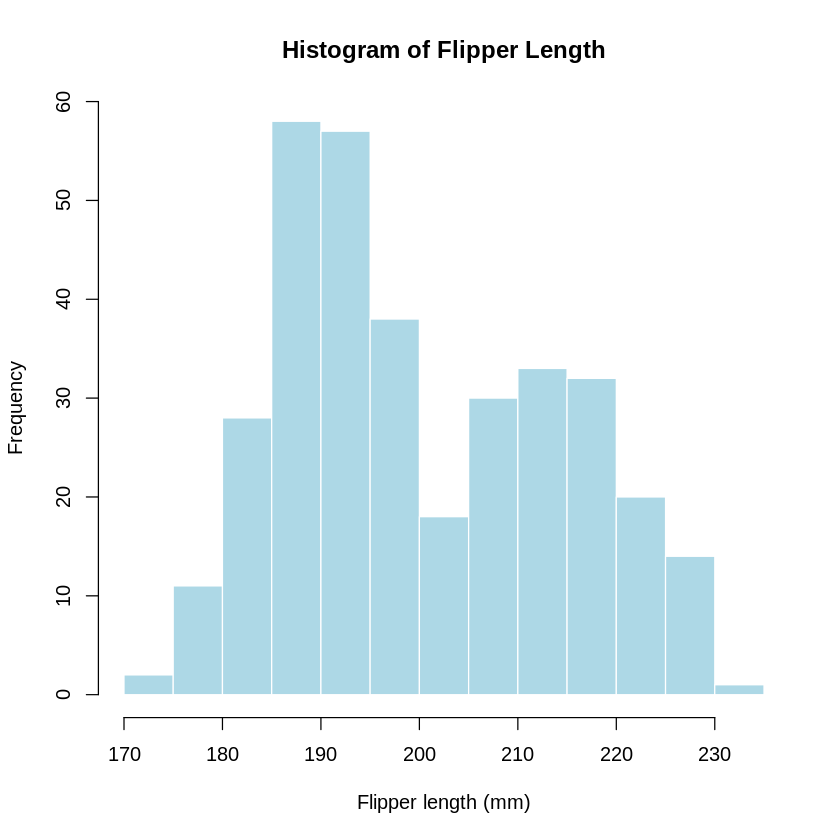

In [ ]:
# Histogram of flipper length
hist(
  penguins$flipper_length_mm,  # the numeric variable we want to plot
  main = "Histogram of Flipper Length",  # title of the plot
  xlab = "Flipper length (mm)",          # label for the x-axis
  col = "lightblue",                     # fill color of the bars
  border = "white"                       # color of the bar borders
)


> **Adjusting figure size in Jupyter/Colab**  
> Sometimes the default plot size is too small or too large. In Jupyter or Colab, we can change the **figure size** before creating a plot. This is useful because:  
> - It makes plots easier to read (especially with many points or labels).  
> - You can adjust the proportions for slides, reports, or just your personal preference.
>
>Try running the code below and experiment with different width/height values to find what works best for you.  


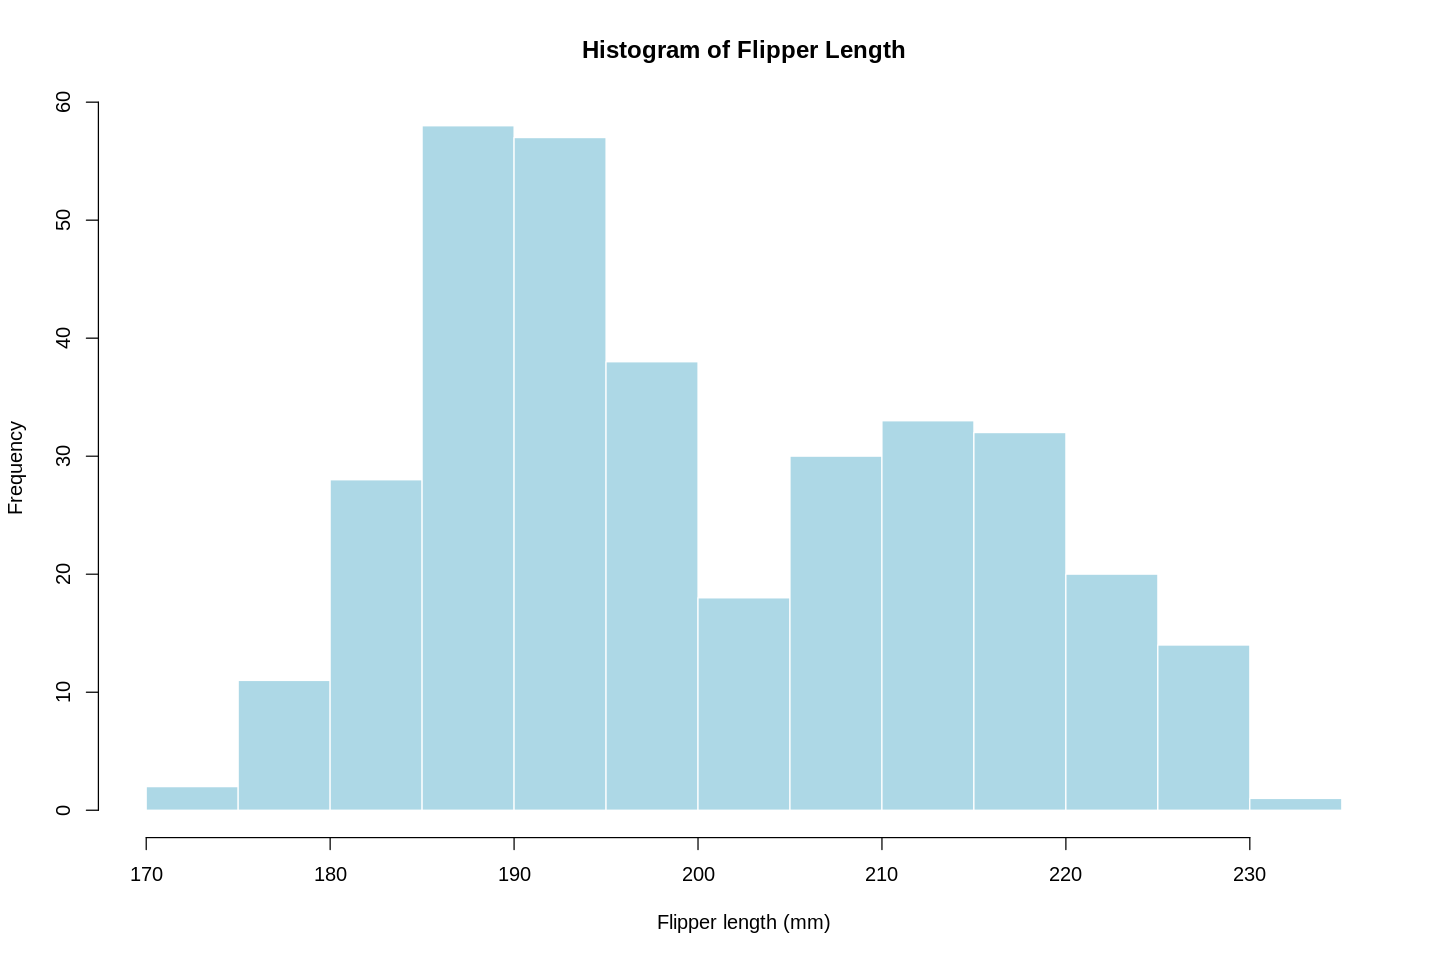

In [ ]:
# Change the figure size for the next plots
options(repr.plot.width = 12,  # width in inches
        repr.plot.height = 8) # height in inches

# Re-run the plot with the new figure size
hist(
  penguins$flipper_length_mm,           # numeric variable
  main = "Histogram of Flipper Length", # title
  xlab = "Flipper length (mm)",         # x-axis label
  col = "lightblue",                    # bar fill
  border = "white"                      # bar border
)


> **A note on colors**  
> R lets you specify colors in several ways:  
> - By **name** (e.g. `"red"`, `"darkorange"`, `"lightblue"`)  
> - By **hex code** (e.g. `"#1f77b4"` for a specific shade of blue)  
> - By using **built-in palettes** (e.g. `rainbow()`, `heat.colors()`)  
>
> **Where to find colors:**  
> - [R CHARTS](https://r-charts.com/colors/) - full list of the colors provided by R `colors()` function
> - You can also use online tools like [Coolors](https://coolors.co/) or [ColorBrewer](https://colorbrewer2.org/) to generate nice hex codes.  
>
> *Tip:* Named colors are convenient, but hex codes give you full control and consistency (e.g. across R and Python).  


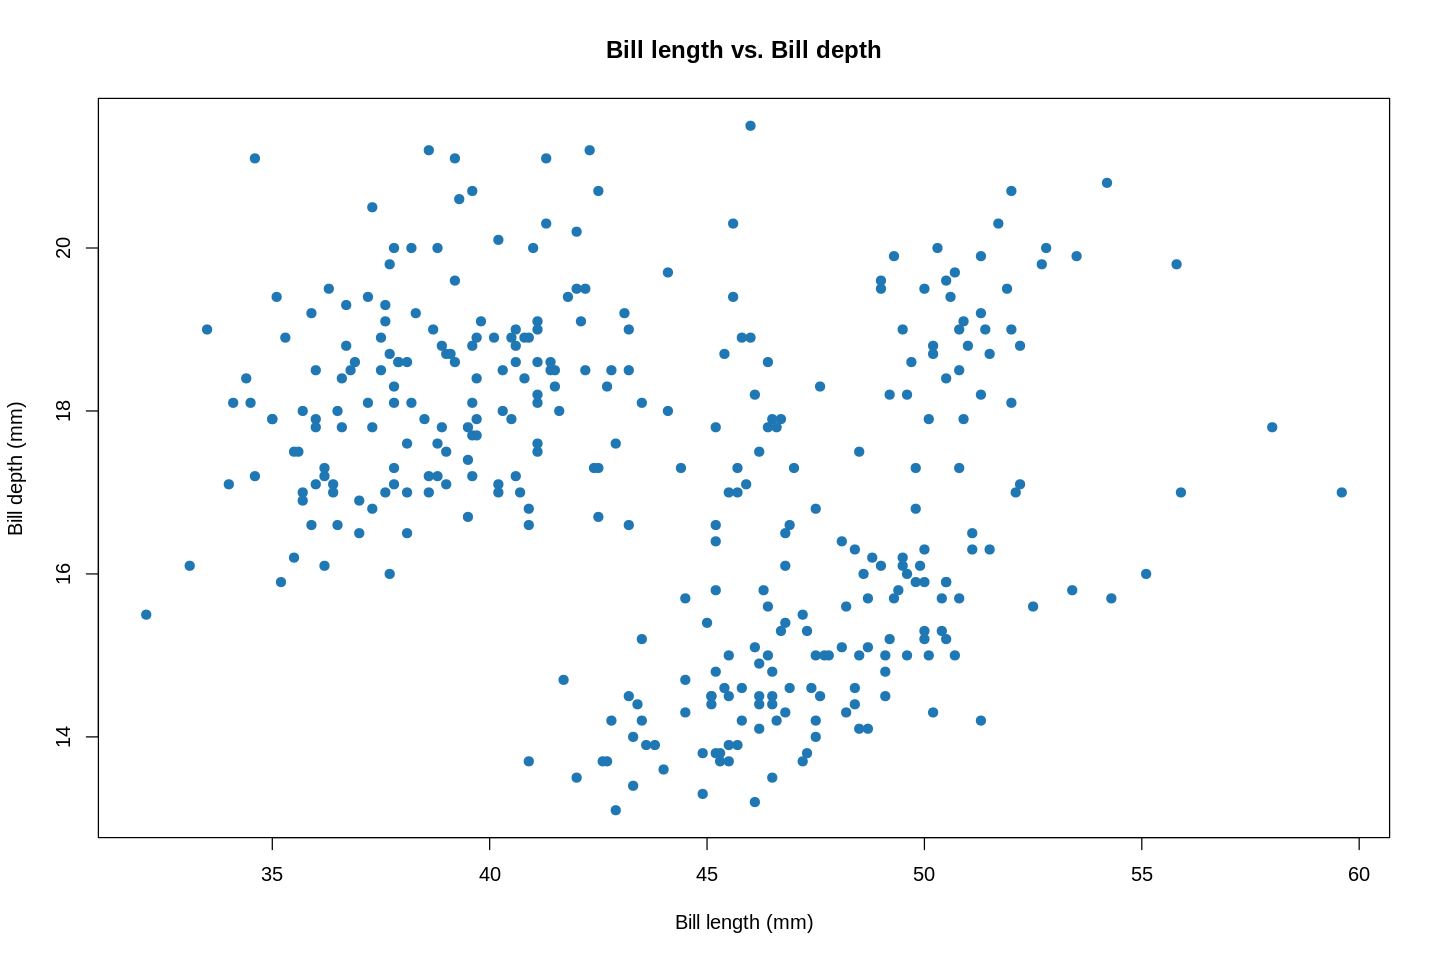

In [ ]:
# Scatter plot of bill length vs. bill depth
plot(
  penguins$bill_length_mm,   # x-axis variable
  penguins$bill_depth_mm,    # y-axis variable
  main = "Bill length vs. Bill depth",  # title of the plot
  xlab = "Bill length (mm)",            # x-axis label
  ylab = "Bill depth (mm)",             # y-axis label
  col = "#1f77b4",                      # color of the points
  pch = 19                              # point shape (19 = solid circle)
)

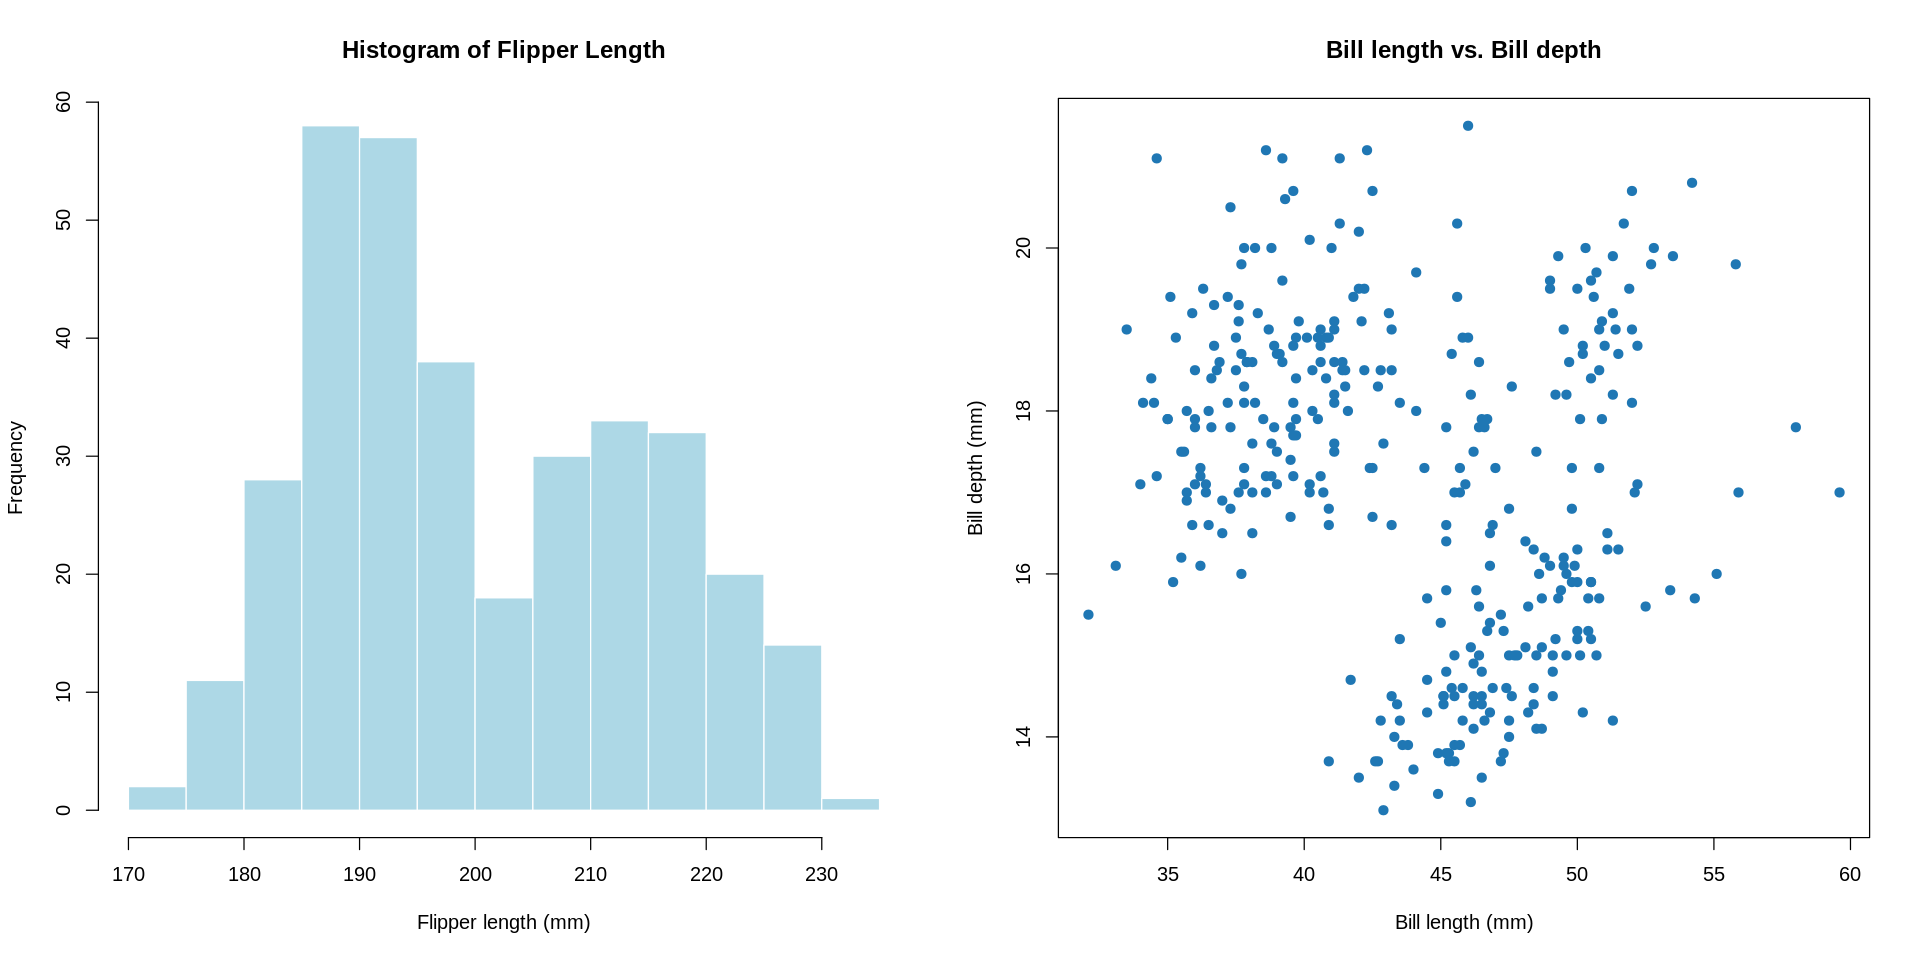

In [ ]:
# Arrange 2 plots side by side
options(repr.plot.width = 16, repr.plot.height = 8)
par(mfrow = c(1, 2))   # set plotting area: 1 row, 2 columns

# First plot: histogram
hist(
  penguins$flipper_length_mm,  # numeric variable
  main = "Histogram of Flipper Length",  # title
  xlab = "Flipper length (mm)",          # x-axis label
  col = "lightblue",                     # bar fill
  border = "white"                       # bar border
)

# Second plot: scatter plot
plot(
  penguins$bill_length_mm,   # x variable
  penguins$bill_depth_mm,    # y variable
  main = "Bill length vs. Bill depth",  # title
  xlab = "Bill length (mm)",            # x-axis label
  ylab = "Bill depth (mm)",             # y-axis label
  col = "#1f77b4",                      # point color
  pch = 19                              # point shape
)

par(mfrow = c(1, 1))  # reset layout back to default (1 plot at a time)

### <font color='gold'> Task 1 </font>  

Plot the **scatter plot of bill length vs. bill depth**, but this time:  
- Color the points based on **species**  
- Use **different marker shapes** for each species  
- Add legend

*This is your first step in learning how to **map categorical variables to visual aesthetics**.*

> *Hints:*  
> - Use the arguments `col = ...` and `pch = ...` inside the `plot()` function.  
> - Both of these can be mapped from `as.factor(penguins$species)`.


In [ ]:
# YOUR CODE HERE!

## From Base R to ggplot2  

As we saw, with base R graphics we can already do **a lot**:  
- Histograms, scatter plots, multiple panels, and even customizing colors and shapes.  
- Base graphics are **highly configurable** and can make very complex figures.  
- But for **common descriptive plots**, they often require extra manual work.  
  *Example: `barplot()` expects a frequency table, which you must first compute with `table()`.*

This is where the [`ggplot2`](https://r-graph-gallery.com/ggplot2-package.html) package comes in.  
It has become very popular because it makes visualization more **data-first**, while following good design principles inspired by **E. Tufte** and **L. Wilkinson**.  

> **[Tufte-style recommendations](https://ftpmirror1.infania.net/mirror/CTAN/macros/latex/contrib/tufte-latex/sample-book.pdf) (brief):**  
> - Communicate more information with less “ink.”  
> - Don’t emphasize elements unless they are important.  
> - Prefer shapes that are easy to judge (e.g., bar heights over sector areas).  
> - Remove non-informative components (e.g., faux 3D).  
>
> **[Grammar of Graphics (Wilkinson)](https://link.springer.com/book/10.1007/0-387-28695-0):**  
> - When constructing a plot, do **not** start from the chart type.  
> - Instead, start from the **data** and think about what relationships you want to show.  
> - Every plot consists of the following components:  
>   - **Data** - the dataset you want to visualize  
>   - **Aesthetics (scales)** - how variables map to position, color, size, shape, etc.  
>   - **Statistics** - summaries or transformations (counts, smooth lines, regression fits)  
>   - **Geoms** - the geometric objects (points, bars, lines, boxplots)  
>   - **Coordinates** - how data are placed in the plotting space  
>   - **Facets** - splitting into multiple small plots  
>   - **Theme** - the overall appearance  

#### Two entry points in `ggplot2`  

- `ggplot()` → the main and most flexible function, where you build plots layer by layer.  
- `qplot()` (“quick plot”) → a shortcut for simple, exploratory plots (less used in practice).  

> *So while **base R plots work fine**, `ggplot2` makes it much **nicer and faster** to create clear, reproducible, and publication-ready graphics.*  


#### Example: Histogram in `Base R` vs. `ggplot2`  

Let’s compare how the same histogram (distribution of flipper length) looks in **`base R`** and in **`ggplot2`**.

**Recap (`base R` code):**

```R
hist(
  penguins$flipper_length_mm,           # numeric variable
  main = "Histogram of Flipper Length", # title
  xlab = "Flipper length (mm)",         # x-axis label
  col = "lightblue",                    # bar fill
  border = "white"                      # bar border
)
```




Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


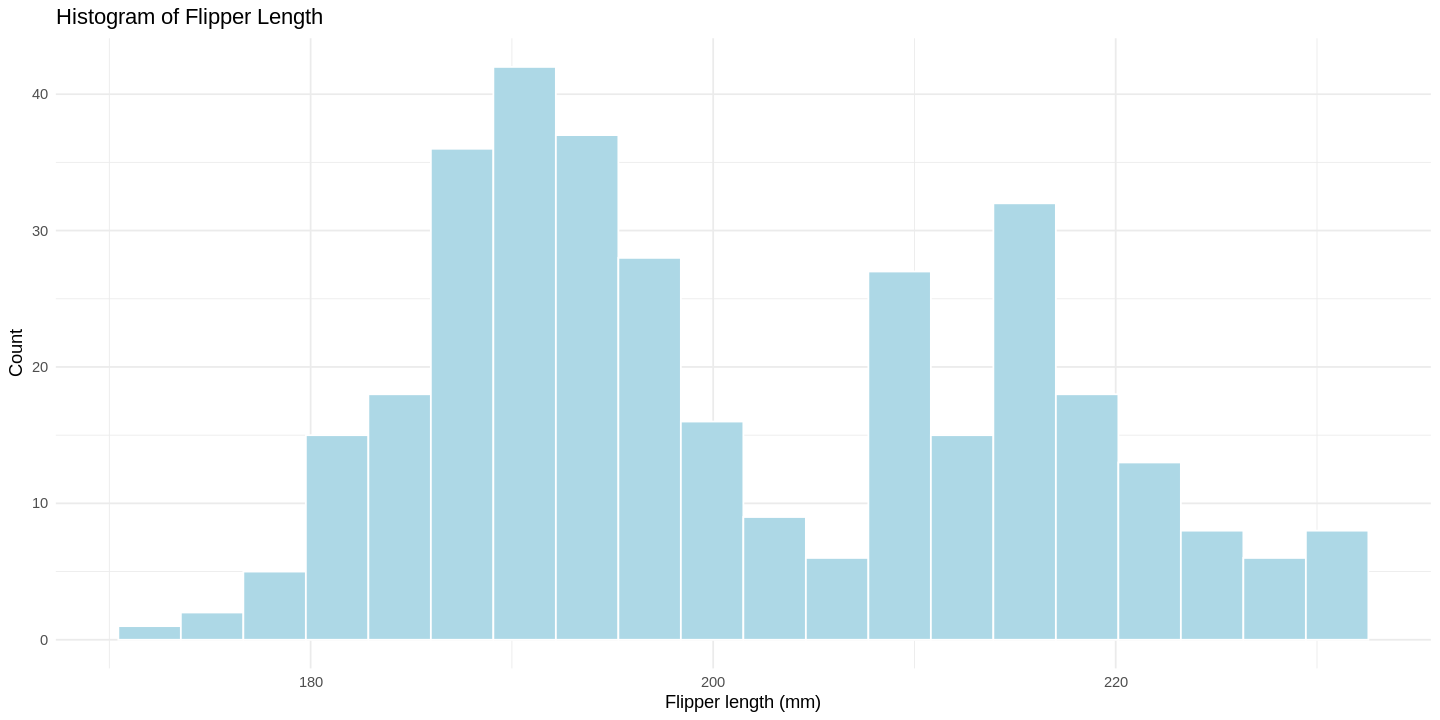

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6)

# ggplot2 histogram of flipper length
ggplot(penguins, aes(x = flipper_length_mm)) +   # define data + aesthetic mapping
  geom_histogram(                                # add histogram layer
    bins = 20,                                   # number of bins
    fill = "lightblue",                          # bar fill color
    color = "white"                              # bar border color
  ) +
  labs(                                          # add labels
    title = "Histogram of Flipper Length",
    x = "Flipper length (mm)",
    y = "Count"
  ) +
  theme_minimal()                                # clean minimal theme


As we see in `ggplot2` we start with the data frame (`penguins`) and map variables inside `aes()` (*aesthetics*) .
Then we add a geom layer (`geom_histogram()`) for the plot type.
Labels and themes are added as separate layers, making the code more structured.

If we would now want to draw **separate histograms by species** (*see code bellow*):  
- In **`base R`**, we would need to **manually split the dataset** and either overlay the histograms with different colors or arrange them into separate panels. This requires extra work and custom code.  
- In **`ggplot2`**, we simply add `aes(fill = species)` to the mapping, and `ggplot` automatically groups the data and assigns colors to each species.  


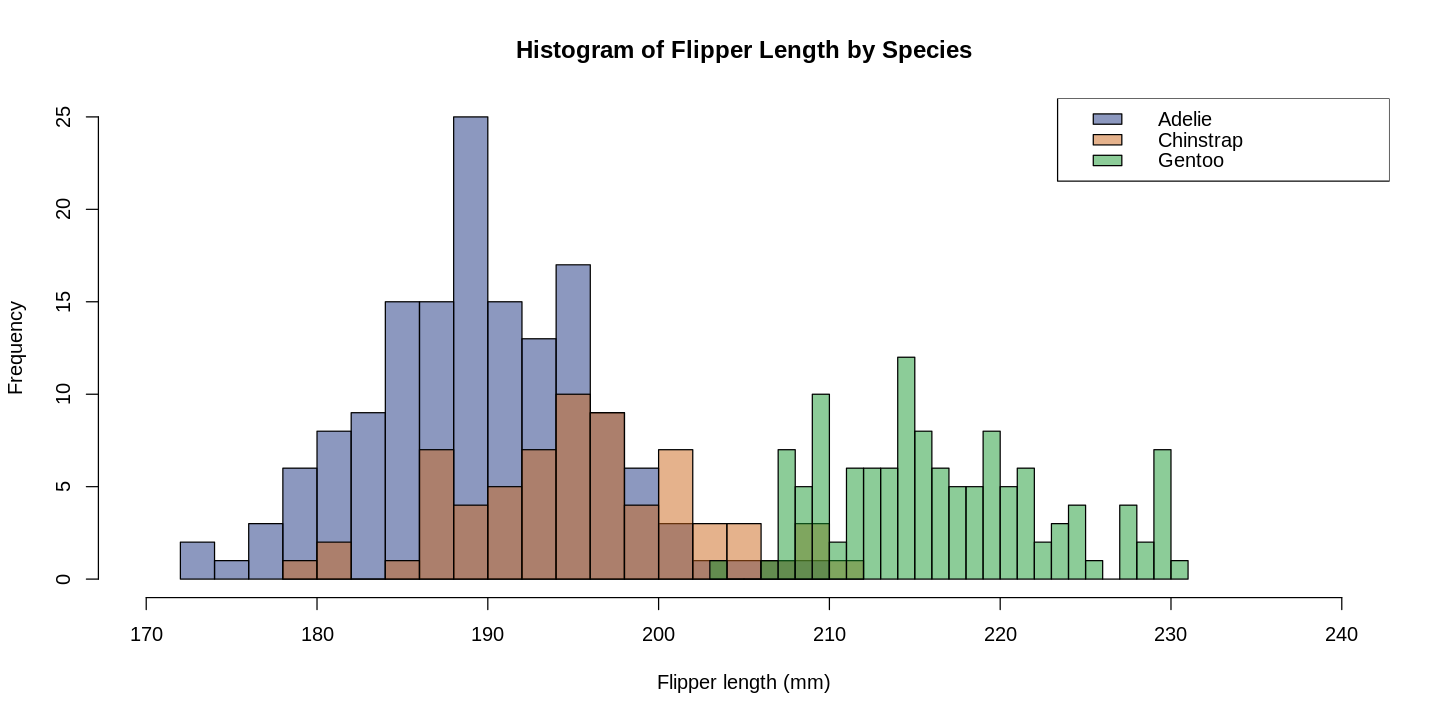

In [ ]:
# Histogram by species in Base R requires manual splitting
# We will use different colors and add a legend.

# Subset data for each species
adelie <- penguins$flipper_length_mm[penguins$species == "Adelie"]
chinstrap <- penguins$flipper_length_mm[penguins$species == "Chinstrap"]
gentoo <- penguins$flipper_length_mm[penguins$species == "Gentoo"]

# Create histograms separately, then overlay using 'add = TRUE'
hist(adelie,
     breaks = 20, col = rgb(0.1, 0.2, 0.5, 0.5), # semi-transparent blue
     main = "Histogram of Flipper Length by Species",
     xlab = "Flipper length (mm)", xlim = c(170, 240))
hist(chinstrap,
     breaks = 20, col = rgb(0.8, 0.4, 0.1, 0.5), add = TRUE) # semi-transparent orange
hist(gentoo,
     breaks = 20, col = rgb(0.1, 0.6, 0.2, 0.5), add = TRUE) # semi-transparent green

# Add legend manually
legend("topright",
       legend = c("Adelie", "Chinstrap", "Gentoo"),
       fill = c(rgb(0.1, 0.2, 0.5, 0.5),
                rgb(0.8, 0.4, 0.1, 0.5),
                rgb(0.1, 0.6, 0.2, 0.5)))


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


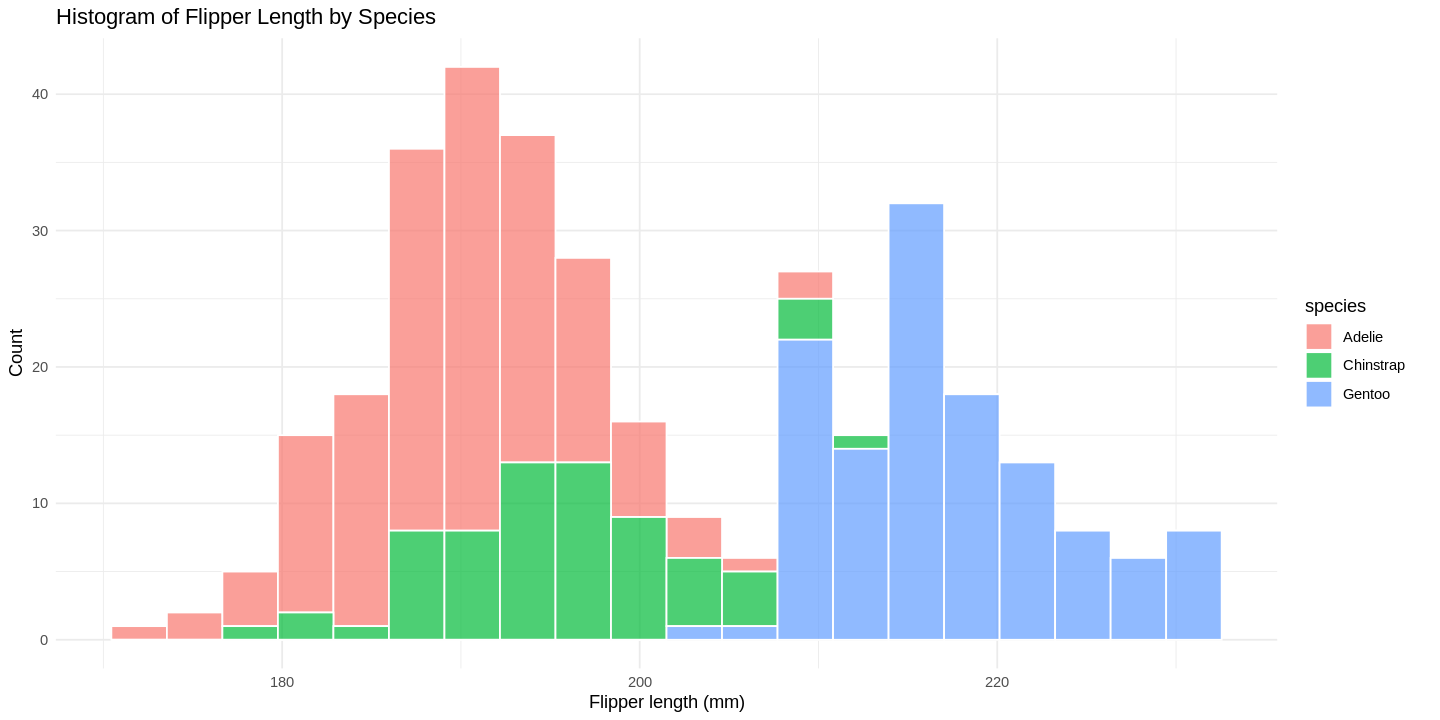

In [ ]:
# Histogram by species in ggplot2
ggplot(penguins, aes(x = flipper_length_mm, fill = species)) +
  geom_histogram(
    bins = 20, color = "white", alpha = 0.7  # white borders + transparency
  ) +
  labs(
    title = "Histogram of Flipper Length by Species",
    x = "Flipper length (mm)", y = "Count"
  ) +
  theme_minimal()


### Why learn `ggplot2`?  

As the previous example clearly demonstrated, **`ggplot2` is very powerful**:  
- It lets us build plots step by step, starting from the data.  
- It handles grouping, coloring, legends, and layouts automatically.  
- The code is cleaner and easier to extend compared to base R.  

In this workshop, we will now go through some of the **main functionalities** of `ggplot2`.  
However, you should know that this is just the beginning - `ggplot2` can do much more.  

> I strongly recommend browsing examples online to see what is possible. A great resource is:  
> - [Top 50 ggplot2 Visualizations](https://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html) - a curated list of common and advanced plots with full code.  
>
> Additionally, you can check:
> - https://r-graph-gallery.com/best-r-chart-examples
> - https://github.com/adamribaudo/storytelling-with-data-ggplot
> - https://medium.com/analytics-vidhya/storytelling-with-your-graphs-in-r-using-ggplot2-f9133c5cc457
> - https://albert-rapp.de/
> - https://www.youtube.com/watch?v=vjJW1m7VZyE  

![cheatsheet1.png](https://rstudio.github.io/cheatsheets/pngs/data-visualization.png)
![cheatsheet2.png](https://rafalab.dfci.harvard.edu/dsbook/R/img/ggplot2-cheatsheetb.png)

## Creating a `ggplot`

As you saw, every `ggplot` begins with function `ggplot()`. Think of it as establishing a coordinate system and data context that we then add layers to. The first argument of `ggplot()` is the dataset (a data frame or tibble).

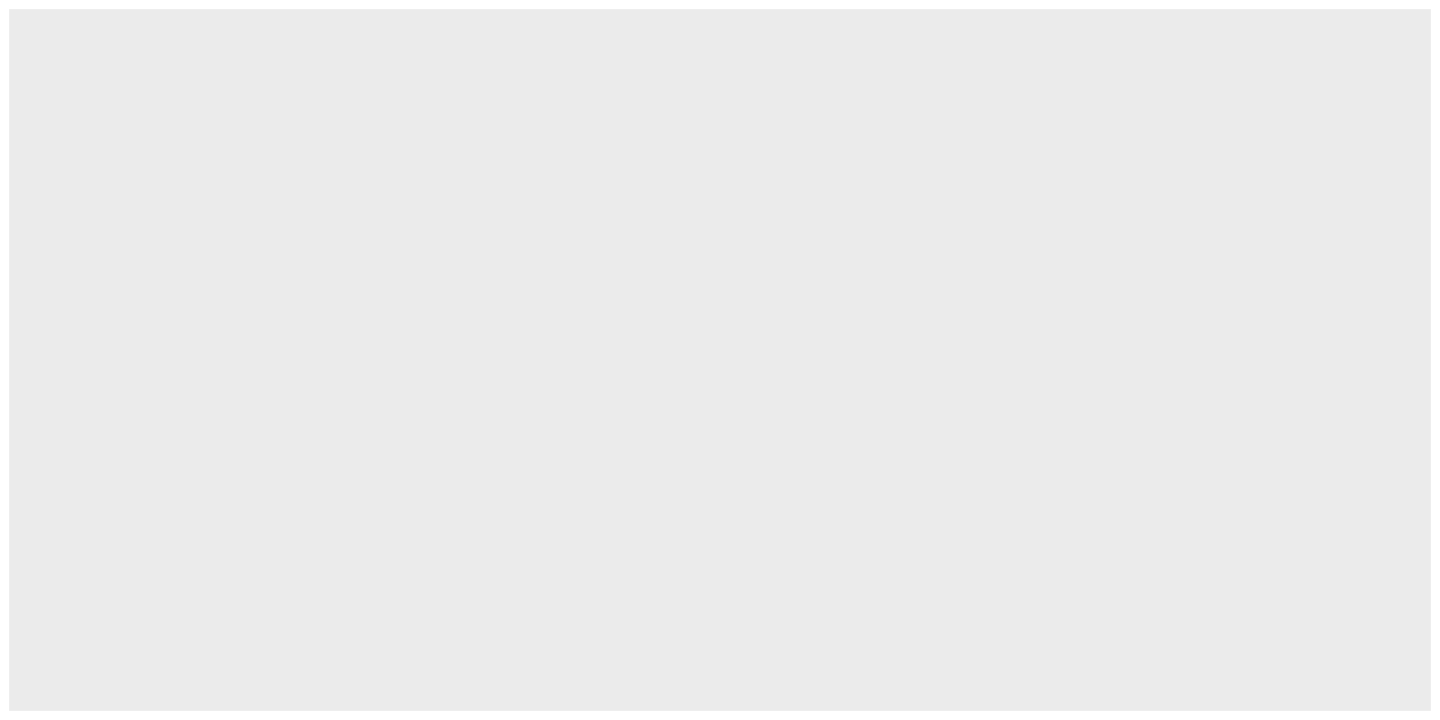

In [ ]:
ggplot(penguins)

> *An empty panel? WHY???*
>
> Because we haven’t told `ggplot` **what to draw** (no geom) and we haven’t told it **which variables map to axes** (no `aes()`).

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


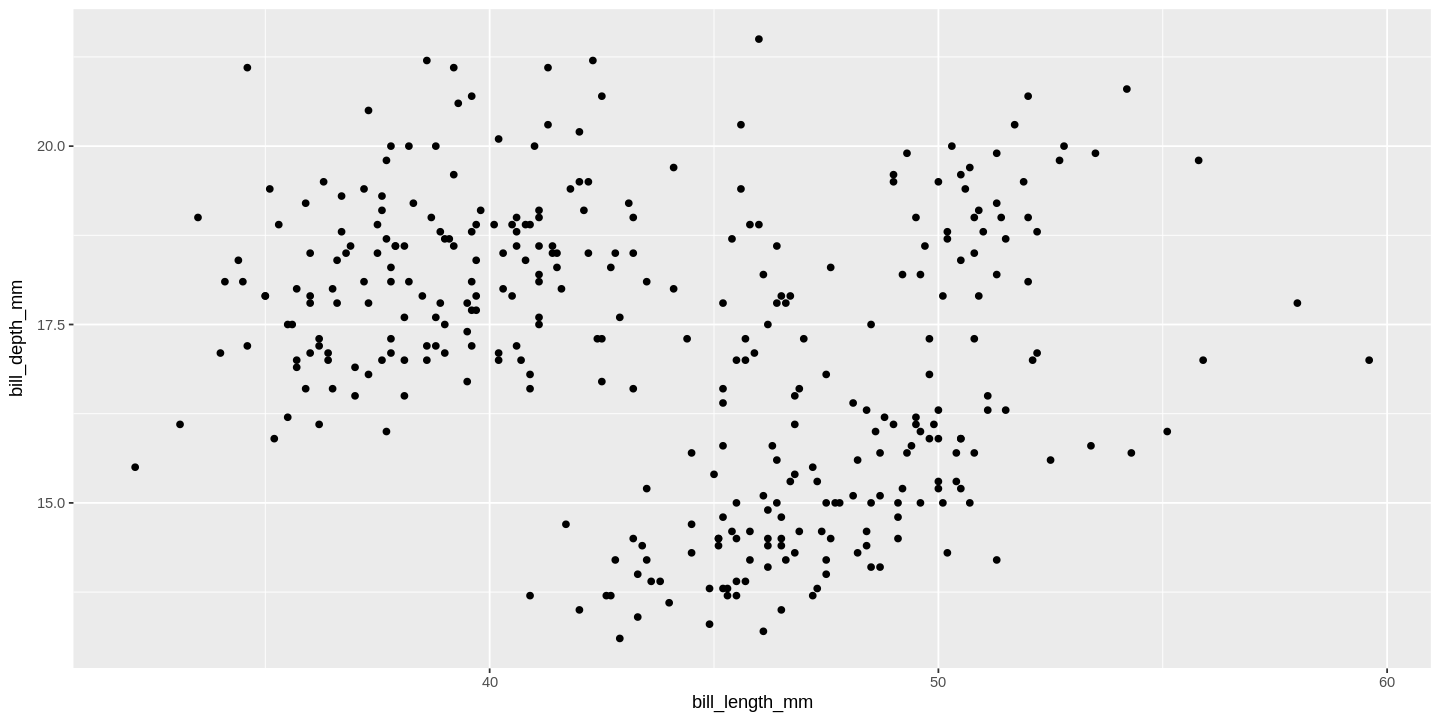

In [ ]:
# Add a geometry layer (points) and map variables to x and y using aes()
ggplot(penguins) +
  geom_point(                         # choose a "what to draw" layer: points
    mapping = aes(                    # aesthetic mappings: which variables go where
      x = bill_length_mm,             # x-axis variable
      y = bill_depth_mm               # y-axis variable
    )
  )


> Before we add more layers to the plot, let’s pause and look at the warning message we saw:\
> `“Removed 2 rows containing missing values or values outside the scale range
(geom_point()).”`
> This happens because two penguins in our dataset are missing one or both of the variables needed for the plot. Since `ggplot2` cannot place a point on the graph without both `x` and `y` values, those rows are skipped.  
> Just like R in general, `ggplot2` follows the principle that missing values should **never disappear silently** - you’ll always get a warning. This is one of the most common messages you’ll see when working with real data, because missing values are extremely common.  
> For the rest of this workshop, we’ll suppress this warning so it doesn’t clutter every plot. Keep in mind, though, that handling missing values is an important part of data analysis, and we’ll revisit this topic later in the course in more detail.


In [ ]:
options(warn = -1)   # turn off warnings

In general, the way `ggplot2` works is very consistent:

1. **Start with your data** → `ggplot(data = <DATA>)`
2. **Add a geometry layer** that decides *what to draw* → `<GEOM_FUNCTION>()`
3. **Define mappings** inside `aes(...)` → link variables in your data to aesthetics (`x`, `y`, `color`, `size`, `shape`, …)

We can summarize this into a reusable template:

```r
ggplot(data = <DATA>) +
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```
- `<DATA>` = the dataset you are working with
- `<GEOM_FUNCTION>` = the type of plot (e.g. `geom_point`, `geom_histogram`, `geom_boxplot`)
- `<MAPPINGS>` = how variables are mapped to axes or visual properties (`x = …`, `y = …`, `color = …`, `shape = …`)

### <font color='gold'> Task 2 </font>  

Using the **`ggplot`**, make a scatter plot of **bill length vs bill depth**, but this time **color the points by species**.  




In [ ]:
# YOUR CODE HERE!

When you map a **categorical** variable (like `species`) to an aesthetic (e.g., `color` or `size`),
ggplot2 automatically:
- builds a **scale** that assigns a distinct aesthetic value to each category, and
- adds a **legend** that explains the mapping.


Let’s now make the plot even richer by showing **penguin body mass** through the **size of the points**.  
That way, each point tells us three things at once:  
- Position on the *x*-axis = bill length  
- Position on the *y*-axis = bill depth  
- Color = species  
- Size = body mass  

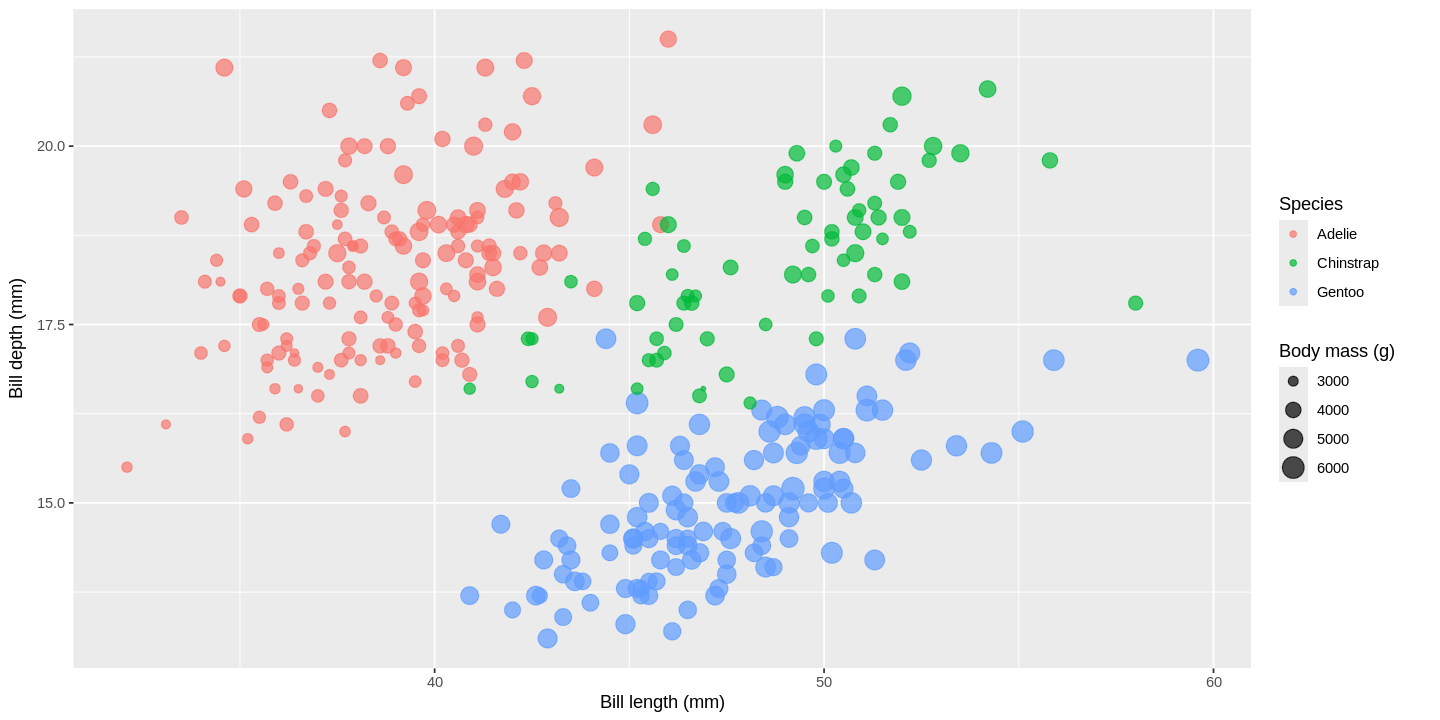

In [ ]:
ggplot(penguins) +
  geom_point(aes(x = bill_length_mm, y = bill_depth_mm, color = species, size = body_mass_g),
             alpha = 0.7) + # make points slightly transparent
  labs(
    x = "Bill length (mm)", # label for the x-axis
    y = "Bill depth (mm)",  # label for the y-axis
    color = "Species",      # legend title for colors
    size = "Body mass (g)"  # legend title for size
  )

> The `labs()` function lets you control axis labels, plot titles, subtitles, captions, and the titles of legends (for any mapped aesthetics).

### Adding Layers

To add more layers, just keep extending the template:

```r
ggplot(data = <DATA>) +
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>)) +
  <ANOTHER_GEOM>(mapping = aes(<MAPPINGS>)) +
  ...
```

Let's try it by plotting body mass against flipper length, and then add a fitted linear trend line on top of the points using `geom_smooth(method = "lm")`.

`geom_smooth()` using formula = 'y ~ x'


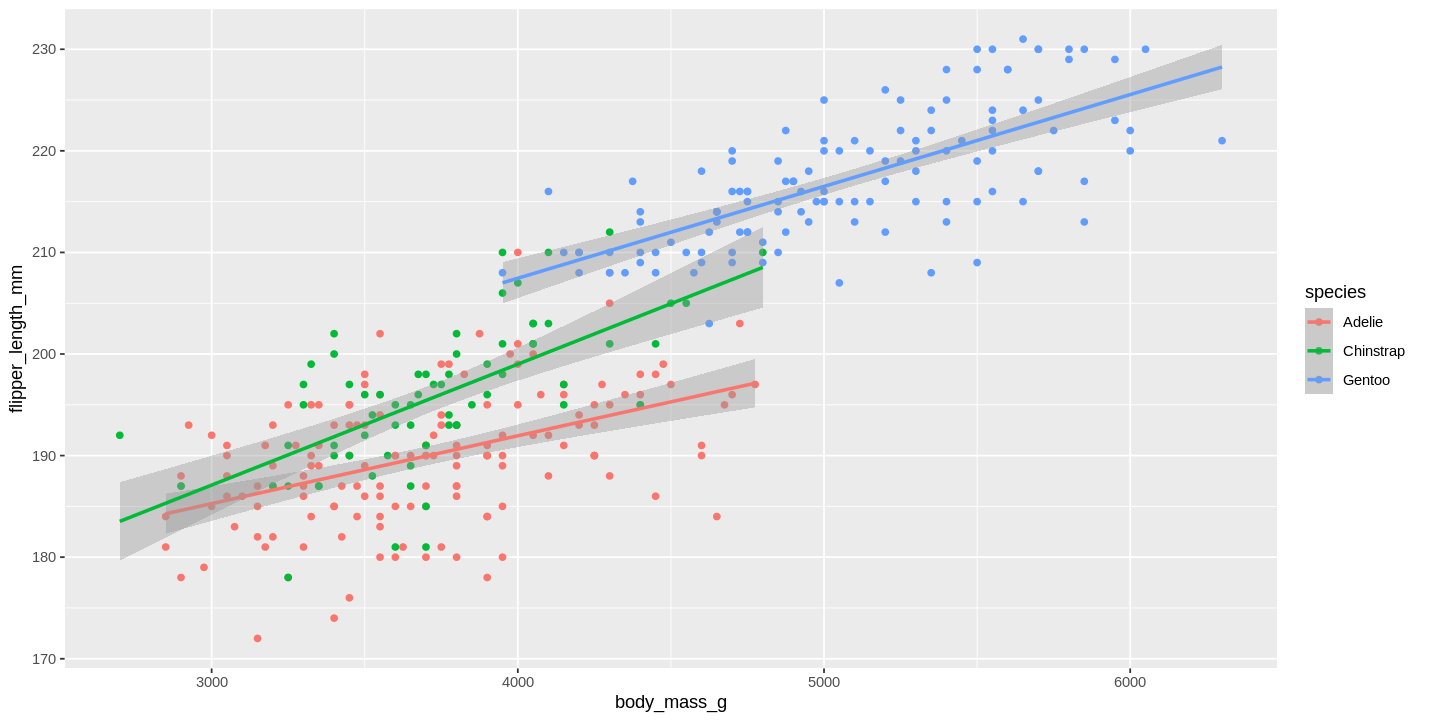

In [ ]:
ggplot(data = penguins) +
  geom_point(mapping = aes(x = body_mass_g, y = flipper_length_mm, color = species)) + # first layer: points
  geom_smooth(mapping = aes(x = body_mass_g, y = flipper_length_mm, color = species), method = "lm", se = T) # second layer: lines

> `geom_point(...)` draws the points.\
> `geom_smooth(method = "lm"`) adds a best-fit straight line (linear model).\
> `se = TRUE/FALSE` toggles the confidence band.
>
> **Where to find more smoothing methods?**
> `geom_smooth()` can use several engines via `method = ...`:
> - `"loess"` - local smoothing (good for smaller datasets)
> -`"gam"` - generalized additive model (requires `mgcv`; e.g., `method = "gam"`, `formula = y ~ s(x, k = 5)`)
> - `"lm"` - linear model (straight line) (`formula = y ~ x`)
> - `"glm"` - generalized linear model
>
> *Explore:*
> - Help pages: `?geom_smooth`, `?stat_smooth`, `?loess`, `?mgcv::gam`
> - The `ggplot2` cheatsheet for quick reminders.

#### Local vs. Global Mappings

In the plot above, we mapped both the **points** and the **smooth lines** by `species`. This gave us three regression lines, one for each species.
But what if we want to see just one overall trend line across all penguins?

The key idea is the difference between local mappings (inside a specific `geom_*()`) and global mappings (inside the main `ggplot()` call):
- Global mapping: placed inside `ggplot(aes(...))`, it applies to all layers unless overridden.
- Local mapping: placed inside a specific `geom_*()`, it applies only to that layer.

For example, here we keep the points colored by species (local mapping),
but add a global linear fit without species separation:

`geom_smooth()` using formula = 'y ~ x'


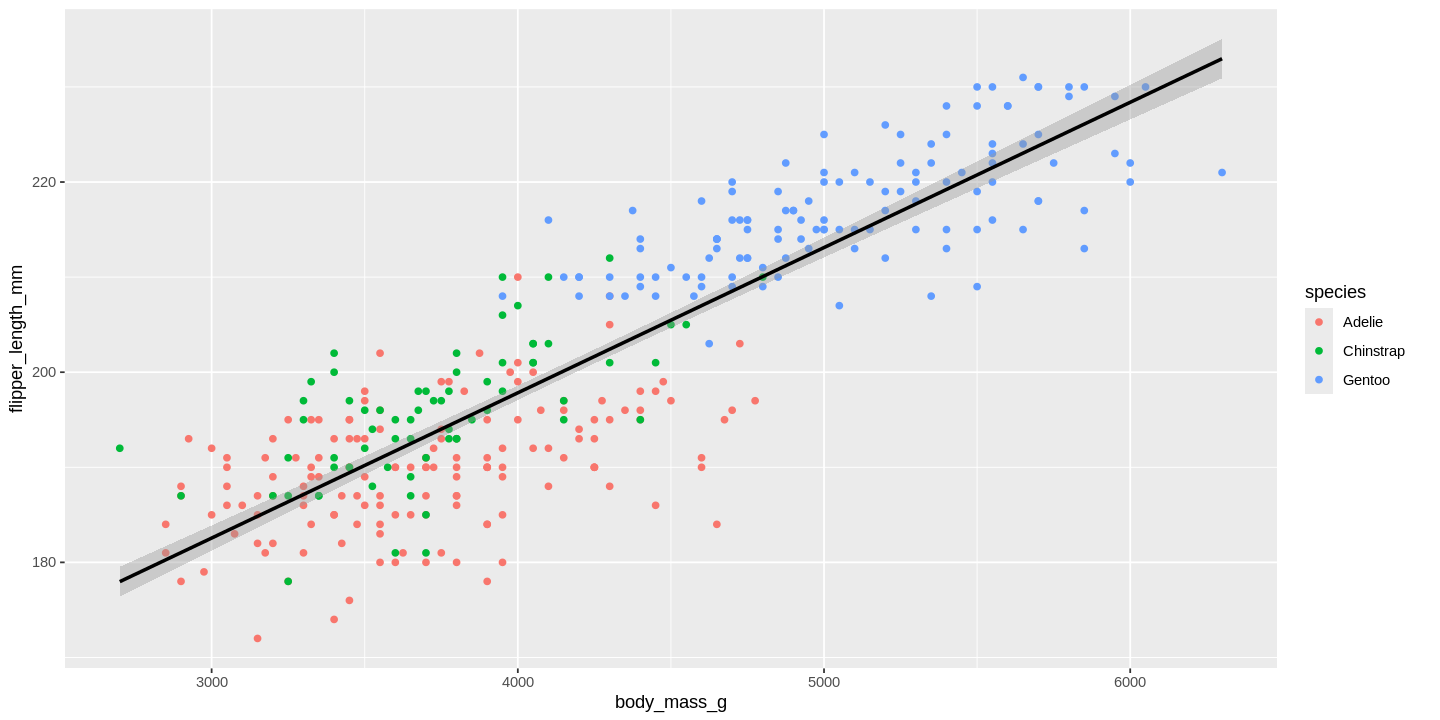

In [ ]:
ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm)) +
  geom_point(aes(color = species)) +          # local mapping (species only here)
  geom_smooth(method = "lm", se = TRUE, color = "black")  # global trend, no species split


Now we see one black line showing the overall relationship across all species.

### Changing Colors

So far, we’ve seen two ways of using color in `ggplot2`:  
1. **Mapped colors** - when we mapped `color = species`, `ggplot2` automatically picked a palette and created a legend.  
2. **Set colors** - when we wanted an overall trend line, we *set* its color directly with `color = "black"`.  

> The difference:  
>- Inside `aes(...)` → **mapping**, the color depends on the data.  
>- Outside `aes(...)` → **setting**, the color is fixed and the same for all observations.  


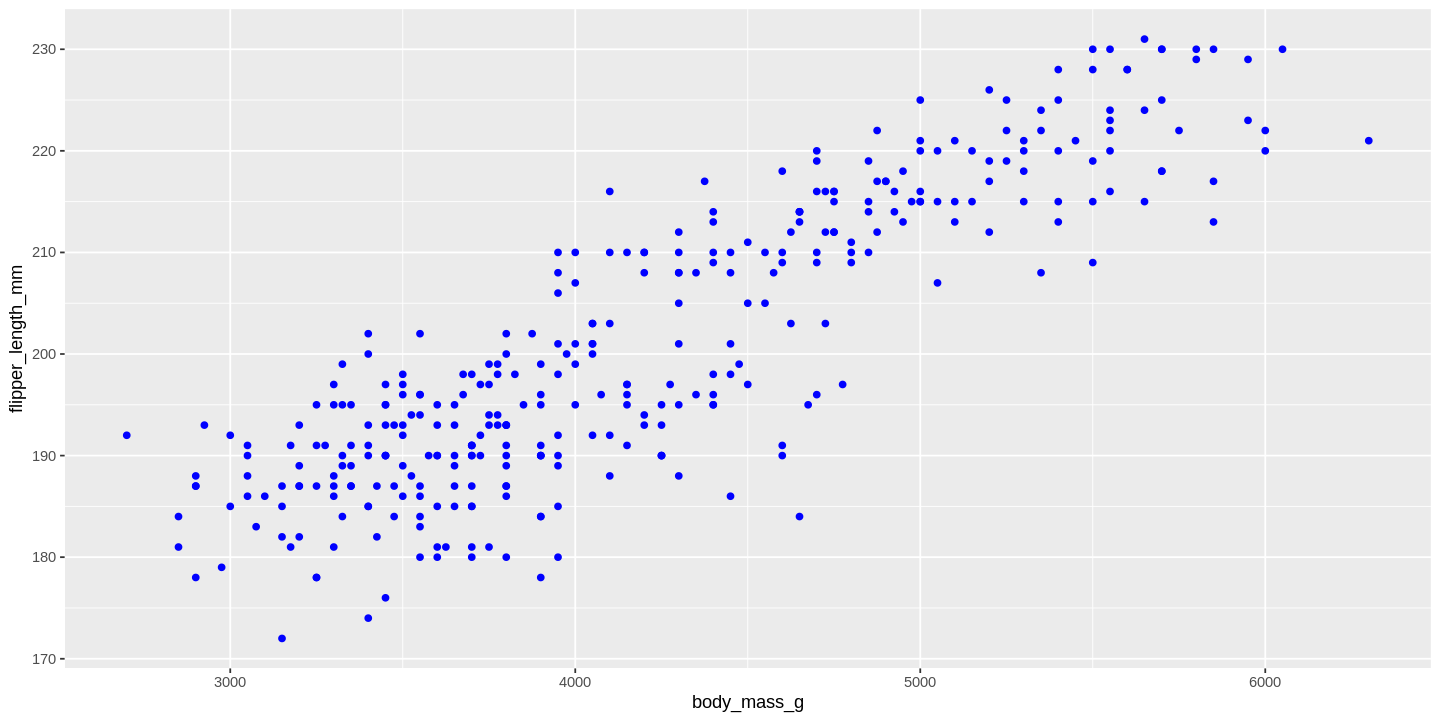

In [ ]:
ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm)) +
  geom_point(color = "blue")   # set color manually


You can also override `ggplot2`’s default palette using `scale_color_manual()`.

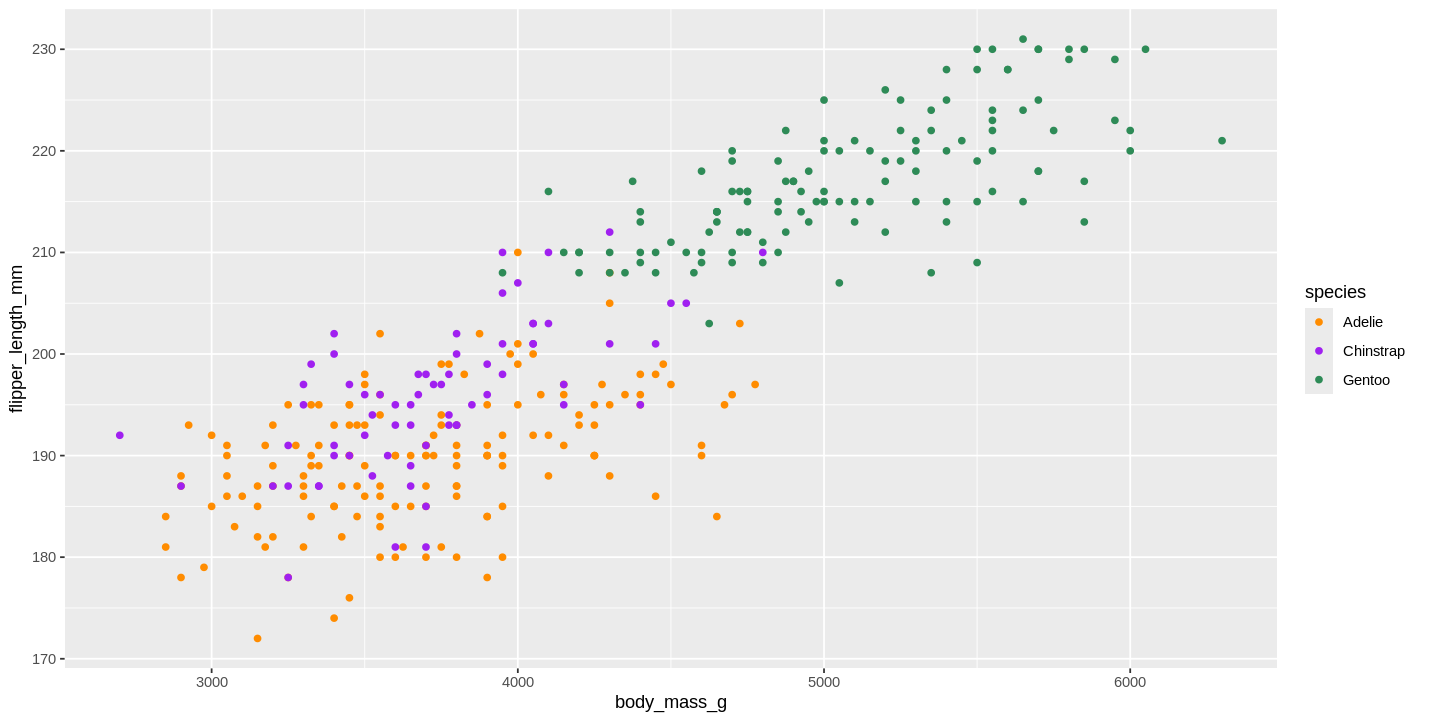

In [ ]:
ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm, color = species)) +
  geom_point() +
  scale_color_manual(
    values = c("Adelie" = "darkorange", # not picked randomly → see the cover picture
               "Chinstrap" = "purple",
               "Gentoo" = "seagreen")
  )


Now each species gets the exact color you choose.

Up to now, we have colored our points based on a **categorical variable** (`species`). This works well when we want to separate groups clearly.\
But what if we don’t want to color by categories, and instead want to show a **continuous variable** (for example, body mass)?  

In this case, `ggplot2` uses **gradients** rather than discrete hues.

In general there are three main types of color scales (2 for continues variables and 1 for categorical variables)
1. **Sequential gradient** - for continuous variables; the smallest and largest values map to two colors, with in-between values shown as blends.  
2. **Diverging gradient** - for continuous variables with a meaningful midpoint (e.g., zero, the mean, or another reference). The extremes get contrasting colors, the midpoint a neutral tone.  
3. **Qualitative palettes** – for categorical variables; each category is assigned a distinct, equally intense color.

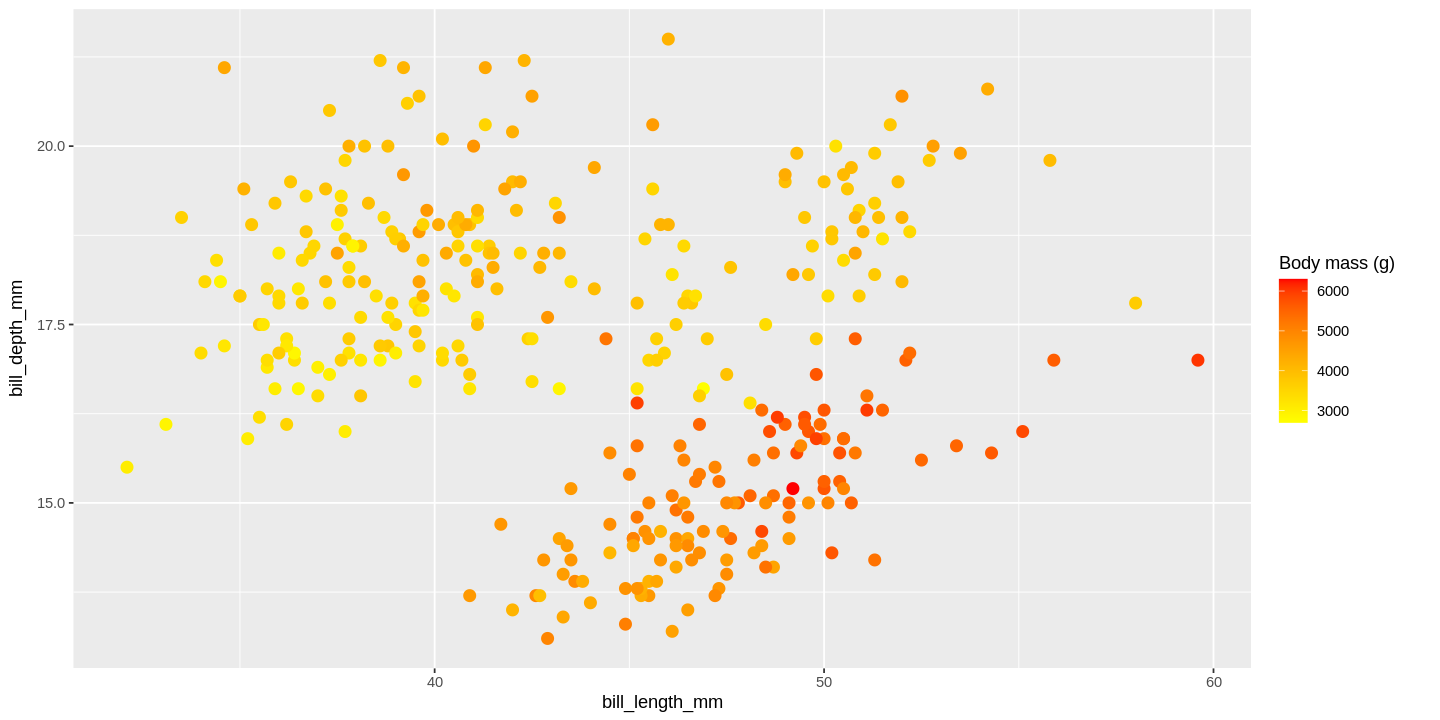

In [ ]:
# Sequential gradient (body mass)
ggplot(penguins, aes(bill_length_mm, bill_depth_mm)) +
  geom_point(aes(color = body_mass_g), # map body mass (continuous) to color
  size = 3) +                          # make points larger for clarity
  scale_color_gradient(
    name = "Body mass (g)",            # legend title
    low = "yellow",                    # color for the lowest body mass
    high = "red"                       # color for the highest body mass
  )


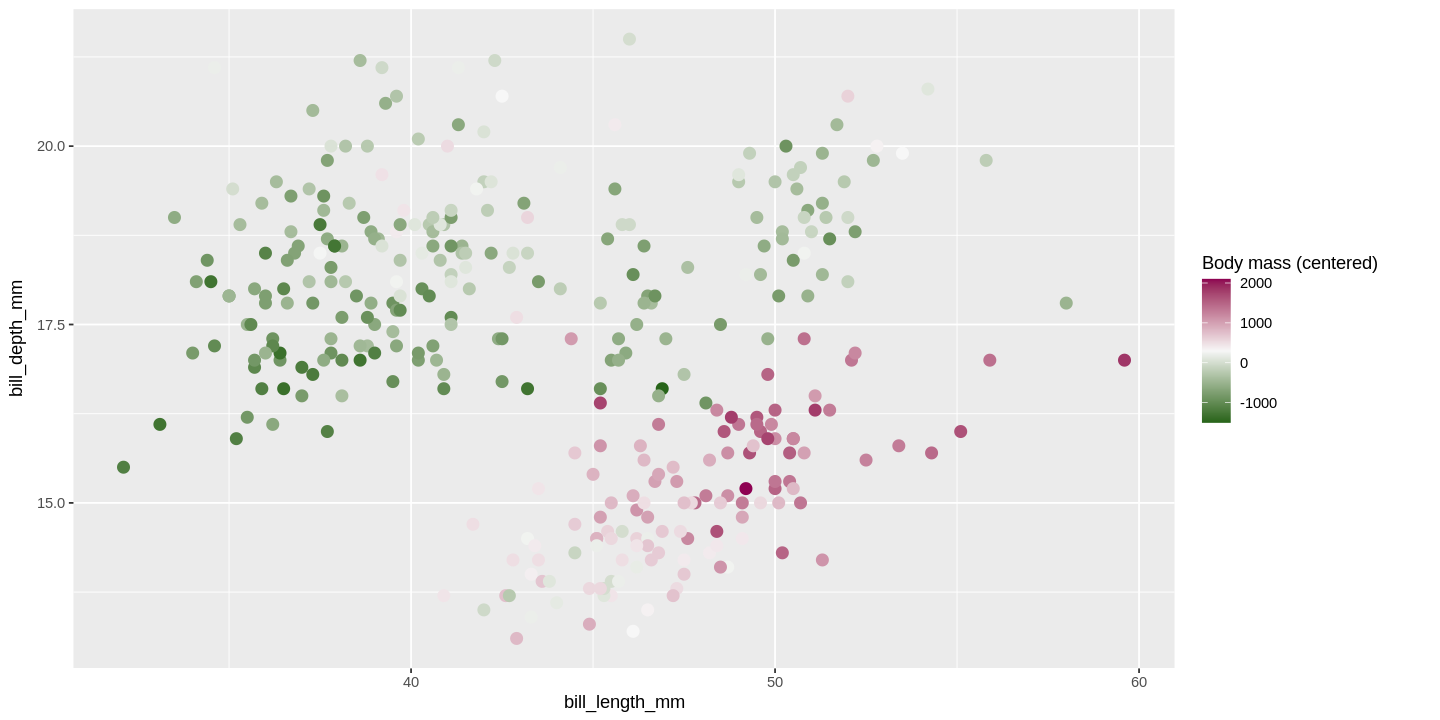

In [ ]:
# Diverging gradient (centered body mass)
mean_mass <- mean(penguins$body_mass_g, na.rm = TRUE)

ggplot(penguins, aes(bill_length_mm, bill_depth_mm)) +
  geom_point(aes(color = body_mass_g - mean_mass), size = 3) +
  scale_color_gradientn(
    colors = c("#276419", "#f7f7f7", "#8e0152"),
    name = "Body mass (centered)"
  )


> *Note:* In `ggplot2` there are both `scale_color_*()` and `scale_fill_*()` functions.  
>
> - Use **`color`** when you are mapping the *outline* of a shape (e.g., points, lines).  
> - Use **`fill`** when you are mapping the *interior* of a shape (e.g., bars, histograms, boxplots, polygons).  
>
> Example:  
> - `geom_point(aes(color = ...))` → because points are drawn with colored borders.  
> - `geom_bar(aes(fill = ...))` → because bars are solid shapes that can be filled inside.  


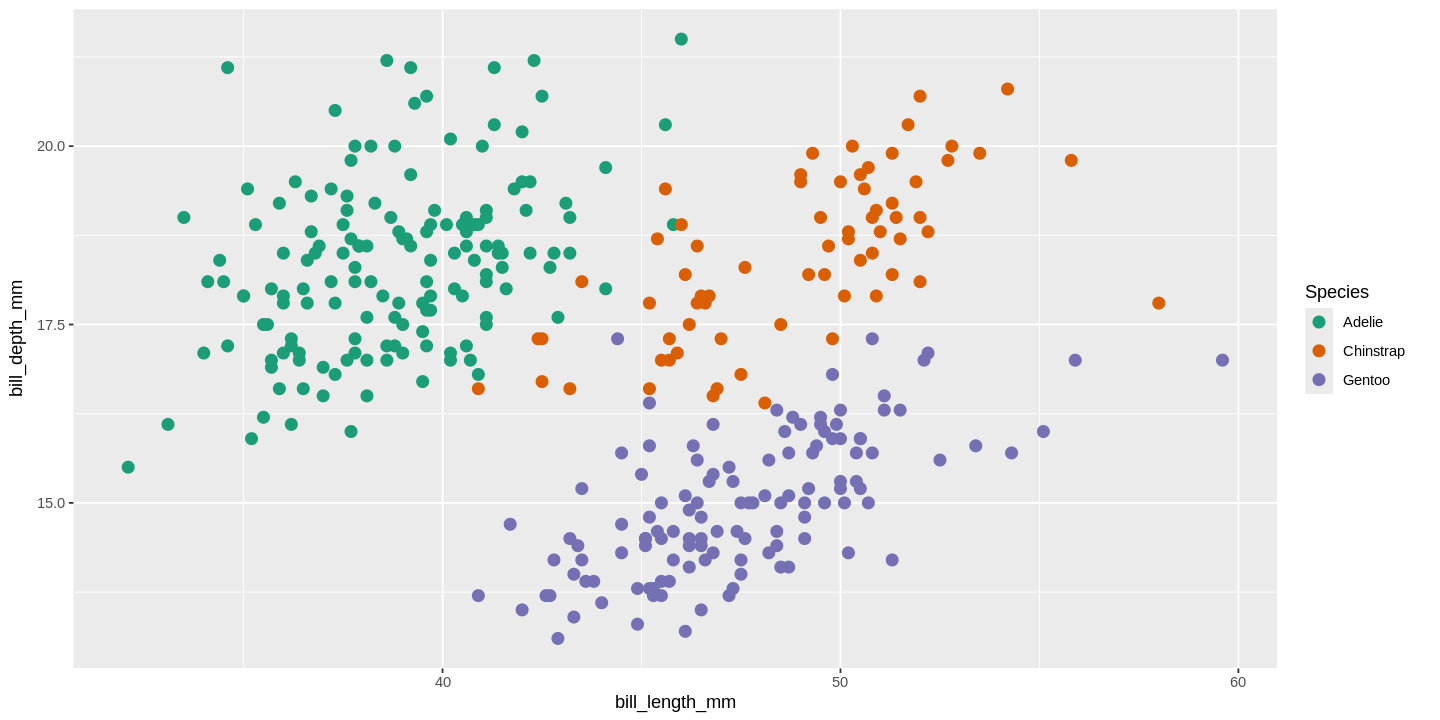

In [ ]:
# Qualitative palettes (species) > with scale_color_brewer()
ggplot(penguins, aes(bill_length_mm, bill_depth_mm, color = species)) +
  geom_point(size = 3) +
  scale_color_brewer(
    type = "qual",      # qualitative palette (categorical data)
    palette = "Dark2",  # choose one of the ColorBrewer palettes
    name = "Species"    # legend title
  )


> *Note on ColorBrewer palettes*
>
> ColorBrewer was originally developed for coloring maps, but is now widely used in data visualization.
> In  `ggplot2`, you can access these palettes with `scale_color_brewer()` (for outlines/points/lines) or `scale_fill_brewer()` (for filled shapes like bars or areas).
> The `type` argument controls the kind of palette:
> - `"seq"` = sequential
> - `"div"` = diverging
> - `"qual"` = qualitative\
> The `palette` argument picks a specific palette within that type. You can find all available palettes at [ColorBrewer2.org](https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3)

### Customizing the Look of Plots: Themes

So far, we have seen that we can change the **size of the figure** (using `options(repr.plot.width, repr.plot.height)` in Jupyter/Colab).  
But `ggplot2` actually allows us to customize *much more* — from background color to axis text, grid lines, and legend styles.  

By default, ggplot2 uses a **grey background** with grid lines. The idea is that lighter colors in your data will be just as visible as darker ones.  
If you prefer a **white background**, you can simply add `+ theme_bw()` to your plot.  



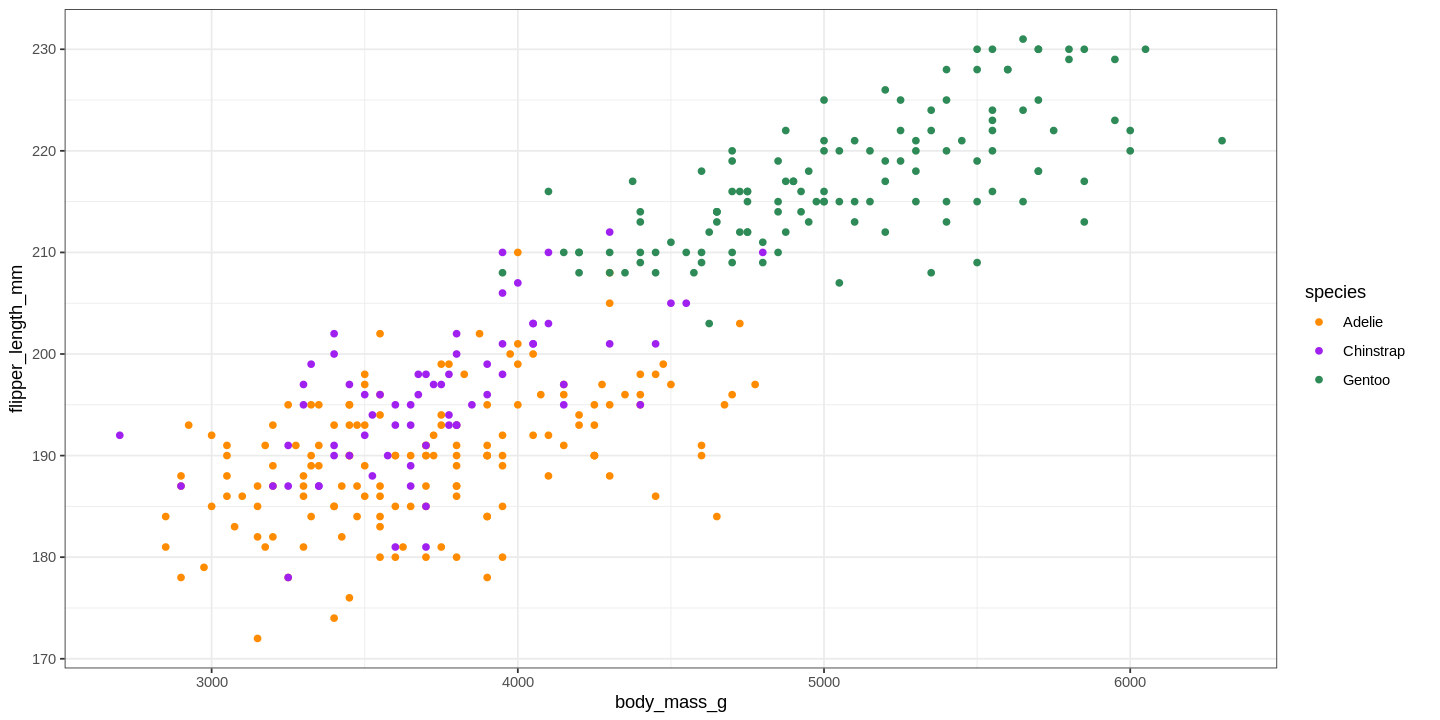

In [ ]:
ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm, color = species)) +
  geom_point() +
  scale_color_manual(
    values = c("Adelie" = "darkorange", # not picked randomly → see the cover picture
               "Chinstrap" = "purple",
               "Gentoo" = "seagreen")
  ) +
  theme_bw()

Or if you are like me and like minimalism, then there is a theme `theme_minimal()`:

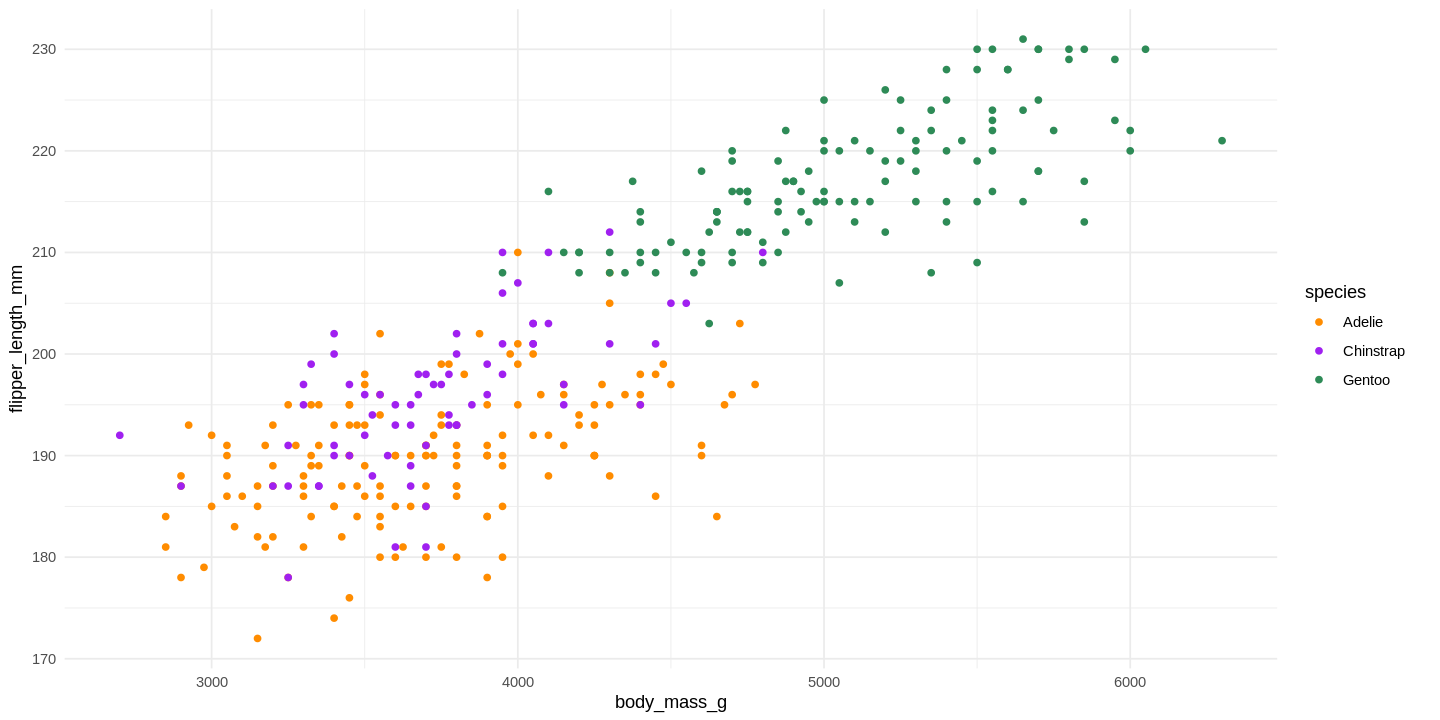

In [ ]:
ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm, color = species)) +
  geom_point() +
  scale_color_manual(
    values = c("Adelie" = "darkorange", # not picked randomly → see the cover picture
               "Chinstrap" = "purple",
               "Gentoo" = "seagreen")
  ) +
  theme_minimal()

As you see, `ggplot2` comes with several built-in themes (`theme_bw()`, `theme_classic()`, `theme_minimal()`, …).
But you are not limited to these defaults: you can write your own theme using `theme()` and then set it globally with `theme_set()`.

#### Common theme elements

Here are some useful arguments of `theme()`:

| Argument            | Element type | What it controls |
|---------------------|--------------|------------------|
| `axis.line`         | line         | axis lines |
| `axis.text.x / y`   | text         | axis tick labels |
| `axis.ticks`        | line         | tick marks |
| `axis.title.x / y`  | text         | axis titles |
| `legend.background` | rect         | legend background |
| `legend.key`        | rect         | background of legend keys |
| `legend.text`       | text         | legend labels |
| `legend.title`      | text         | legend title |
| `panel.background`  | rect         | panel (plot area) background |
| `panel.border`      | rect         | panel border |
| `panel.grid.major`  | line         | major grid lines |
| `panel.grid.minor`  | line         | minor grid lines |
| `plot.background`   | rect         | entire plot background |
| `plot.title`        | text         | plot title |
| `strip.background`  | rect         | background of facet labels |
| `strip.text.x / y`  | text         | facet label text |

A full list can be found in the [ggplot2 theme documentation](https://ggplot2.tidyverse.org/reference/theme.html).


#### How to change appearance

There are three main helper functions:  
- `element_text()` → font family, size, color, angle, horizontal/vertical justification  
- `element_line()` → color, thickness, linetype  
- `element_rect()` → border color, fill color, thickness  

If you don’t want an element at all, use `element_blank()`.  

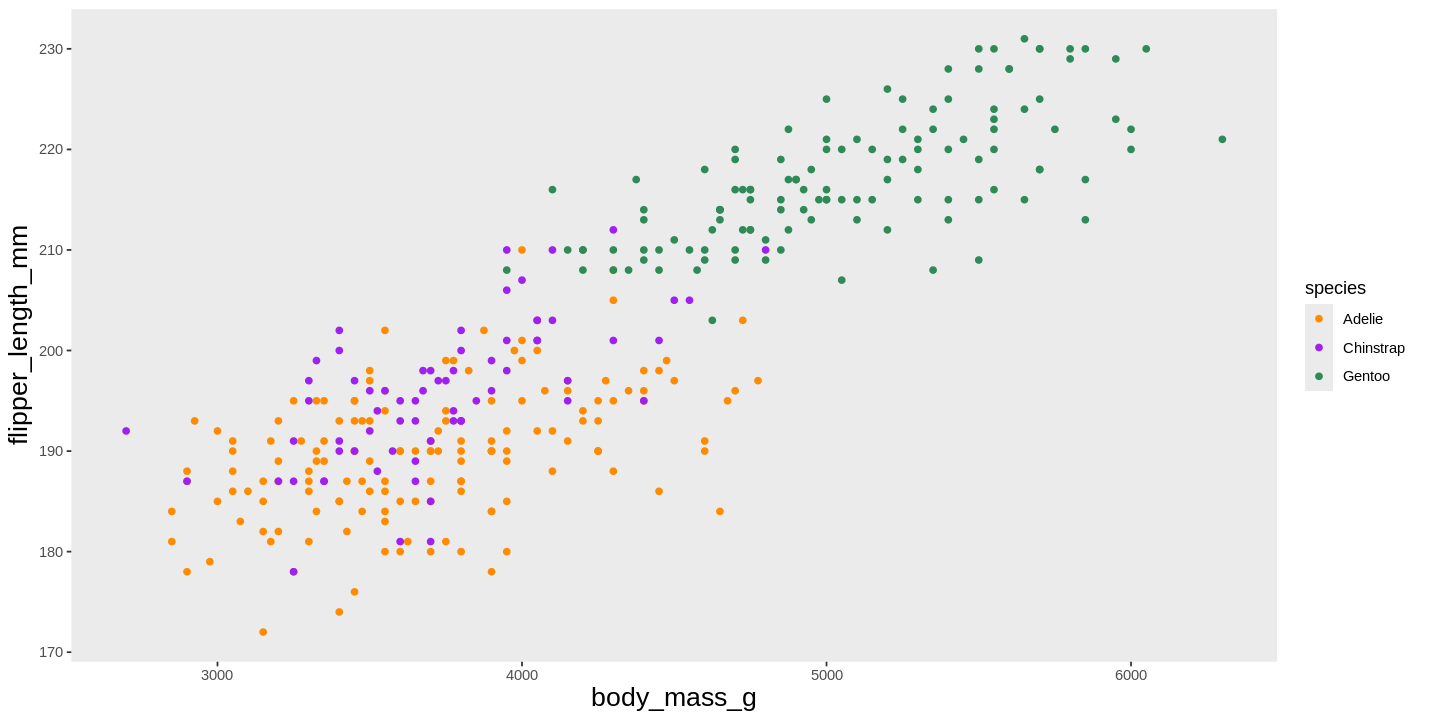

In [ ]:
# Remove grid lines and enlarge axis titles:
ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm, color = species)) +
  geom_point() +
  scale_color_manual(
    values = c("Adelie" = "darkorange", # not picked randomly → see the cover picture
               "Chinstrap" = "purple",
               "Gentoo" = "seagreen")
  ) +
  theme(
    panel.grid.major = element_blank(),       # remove major grid lines
    panel.grid.minor = element_blank(),       # remove minor grid lines
    axis.title = element_text(size = 16)      # larger axis titles
  )


In [ ]:
# A custom “clean” theme
my_clean_theme <- theme_minimal(base_size = 20) +
  theme(
    panel.grid = element_blank(),
    axis.title = element_text(size = 20, face = "bold"),
    plot.title = element_text(size = 24, face = "bold", hjust = 0.5)
  )

#theme_set(my_clean_theme)   # apply to all plots in this session


> *Note:* After running `theme_set(my_clean_theme)`, **all plots in this session** will automatically use your custom theme.  
>
> If you prefer to only apply the theme to specific plots, do **not** use `theme_set()`.  
> Instead, just add your theme at the end of a plot, for example:  
>
> ```r
> ggplot(penguins, aes(flipper_length_mm, body_mass_g, color = species)) +
>   geom_point(size = 3) +
>   my_clean_theme
> ```
>
> This way, only the plots where you explicitly add `+ my_clean_theme` will be affected.


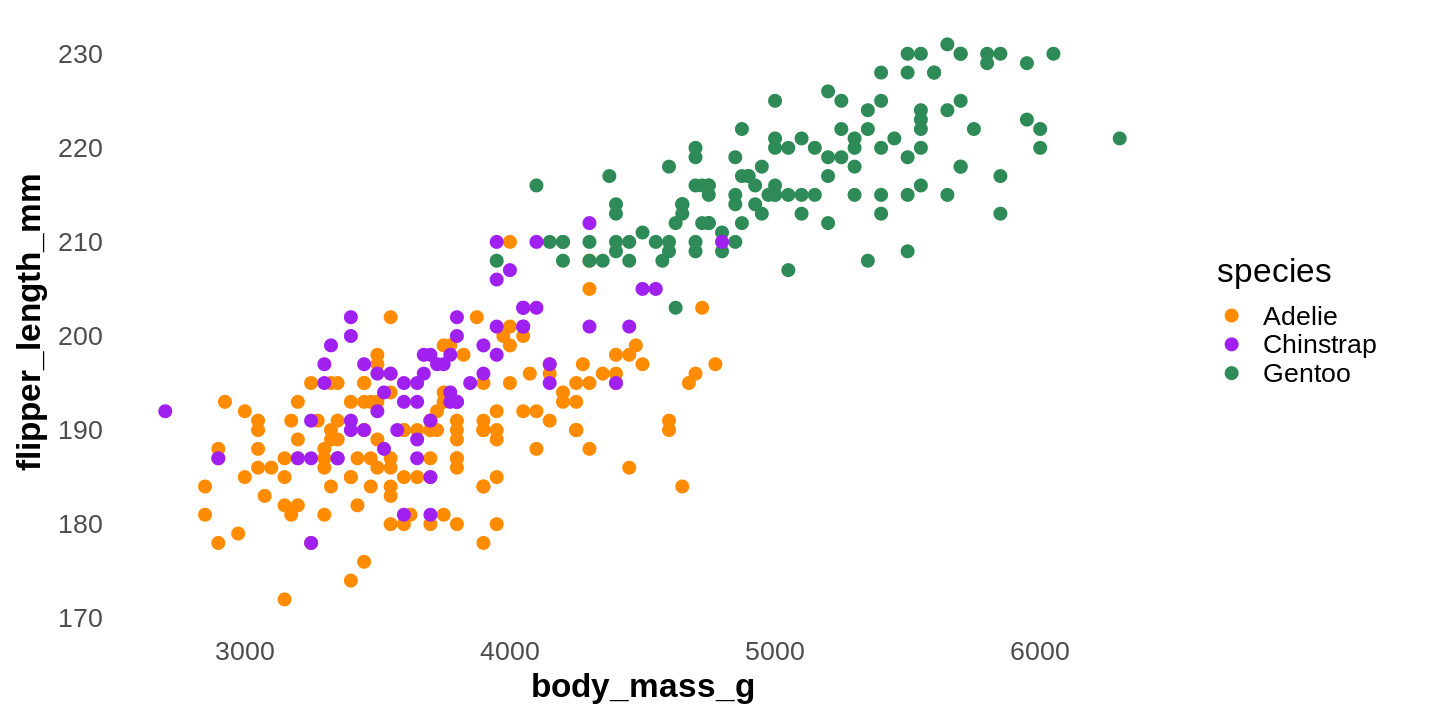

In [ ]:
ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm, color = species)) +
  geom_point() +
  scale_color_manual(
    values = c("Adelie" = "darkorange", # not picked randomly → see the cover picture
               "Chinstrap" = "purple",
               "Gentoo" = "seagreen")
  ) +
  my_clean_theme

### <font color='gold'> Task 3 </font>
Create a plot using **only Gentoo** penguins that shows:
- **y:** body mass (`body_mass_g`)
- **x:** flipper length (`flipper_length_mm`)
- **color:** bill depth (`bill_depth_mm`) *(continuous → gradient)*
- **size:** bill length (`bill_length_mm`)
- **shape:** gender (`sex`)
- Add **year (`year`)** as text labels on the plot.

> *Hints:*
> - Filter first (use the pipe `%>%`) and drop rows with missing values you map.  
> - Text labels can be added with `geom_text()` or, better, `ggrepel::geom_text_repel()` to avoid overlap.  



In [ ]:
# YOUR CODE HERE!

### Facets Instead of Overload.

From your `Task 3` plot we can see we’re trying to encode **year as text labels** on top of:
- color = bill depth (continuous),
- size  = bill length (continuous),
- shape = sex (categorical).

That’s a lot for one view. A cleaner approach is to **split the data by year into small multiples** (facets), so each panel shows a subset and the encodings remain readable.

>**Rule of thumb:** If a variable is *categorical with few levels* and acts like a filter (e.g., `year`, `island`, `sex`),
consider **faceting** rather than adding yet another color/shape/label.


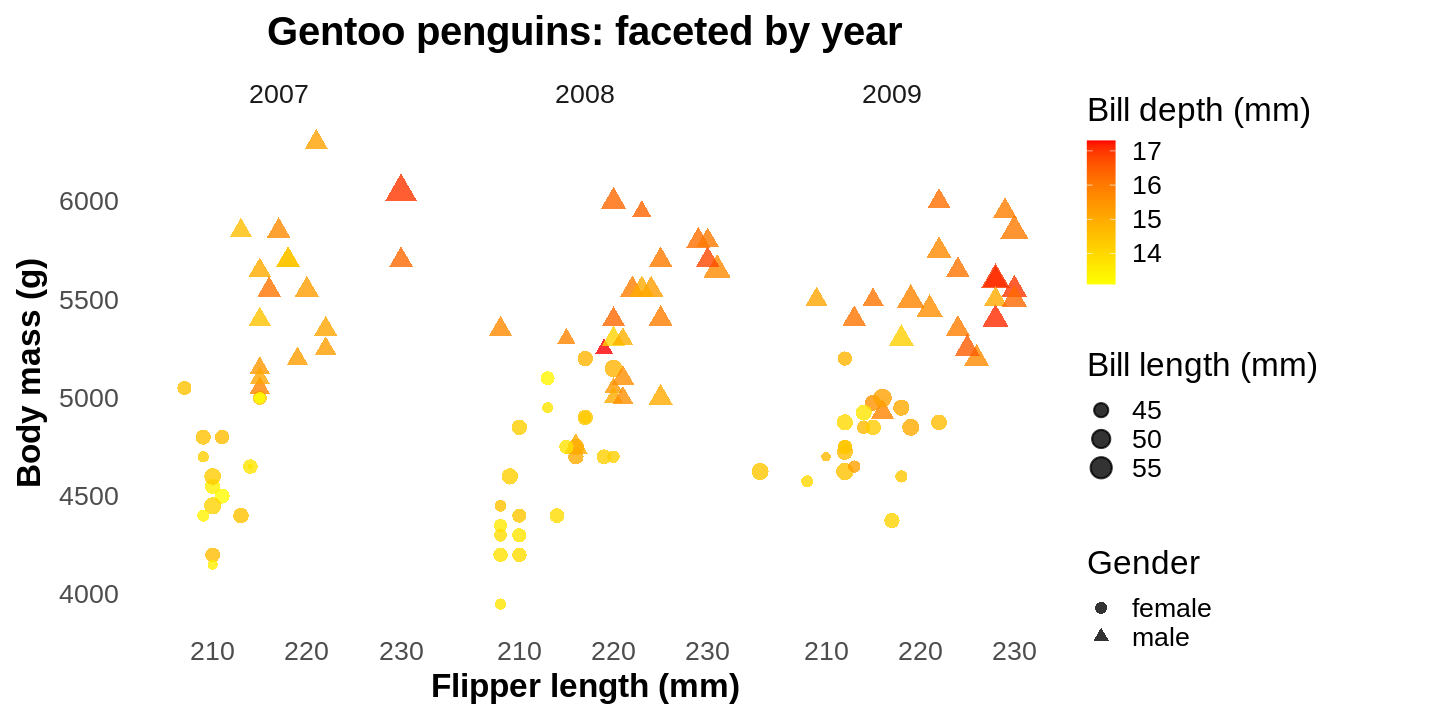

In [ ]:
# Same filtered data as before
gentoo <- penguins %>%
  dplyr::filter(species == "Gentoo") %>%
  tidyr::drop_na(sex, bill_depth_mm, bill_length_mm, flipper_length_mm, body_mass_g, year)

ggplot(gentoo, aes(x = flipper_length_mm, y = body_mass_g)) +
  geom_point(
    aes(
      color = bill_depth_mm,    # continuous → gradient
      size  = bill_length_mm,   # continuous → size
      shape = sex               # categorical → shapes
    ),
    alpha = 0.8
  ) +
  scale_color_gradient(name = "Bill depth (mm)", low = "yellow", high = "red") +
  labs(
    x = "Flipper length (mm)",
    y = "Body mass (g)",
    size  = "Bill length (mm)",
    shape = "Gender",
    title = "Gentoo penguins: faceted by year"
  ) +
  facet_wrap(. ~ year) +   # << split into one panel per year
  my_clean_theme                   # optional: your custom theme


The `facets` argument in `facet_grid()` uses a **formula notation**: `rows_variable ~ columns_variable`.
It means that:
- The variable on the **left** of `~` splits the plot into rows.  
- The variable on the **right** of `~` splits the plot into columns.  
- If you don’t want to split by one dimension, put a `.` (dot) as a placeholder.  




### <font color='gold'> Task 4 </font>  
Create a faceted plot of penguins where:  
- **x:** body mass (`body_mass_g`)  
- **y:** flipper length (`flipper_length_mm`)  
- **color:** sex (`sex`)  
- **rows of facets:** species (`species`)  
- **columns of facets:** year (`year`)  

This way, each small panel will show one species in one year, with male and female penguins in different colors.  



In [ ]:
# YOUR CODE HERE!

### Plot Types

At the start we briefly looked at a **histogram**, but most of our hands-on work so far has used **scatterplots**.  
There are many other plot types. The *right* choice depends on your variables and the question (we’ll discuss this a lot during the course).  
For now, here’s a quick reminder:

| Variable 1 | Variable 2 | Suitable plot type | ggplot geom |
|------------|------------|--------------------|-------------|
| continuous (numeric) | – | histogram (bins) | `geom_histogram` *(fill)* |
| continuous (numeric) | – | density plot| `geom_density` *(fill)* or *(color)* |
| categorical | – | bar chart (counts) | `geom_bar` *(fill)* |
| continuous | continuous | scatterplot | `geom_point` *(color)* |
| continuous | categorical | boxplot | `geom_boxplot` *(fill)* |
| continuous | categorical | violin plot | `geom_violin` *(fill)* |
| continuous | time / sequence | line plot | `geom_line` |


Below are minimal, commented examples on **palmerpenguins**.


#### Histogram

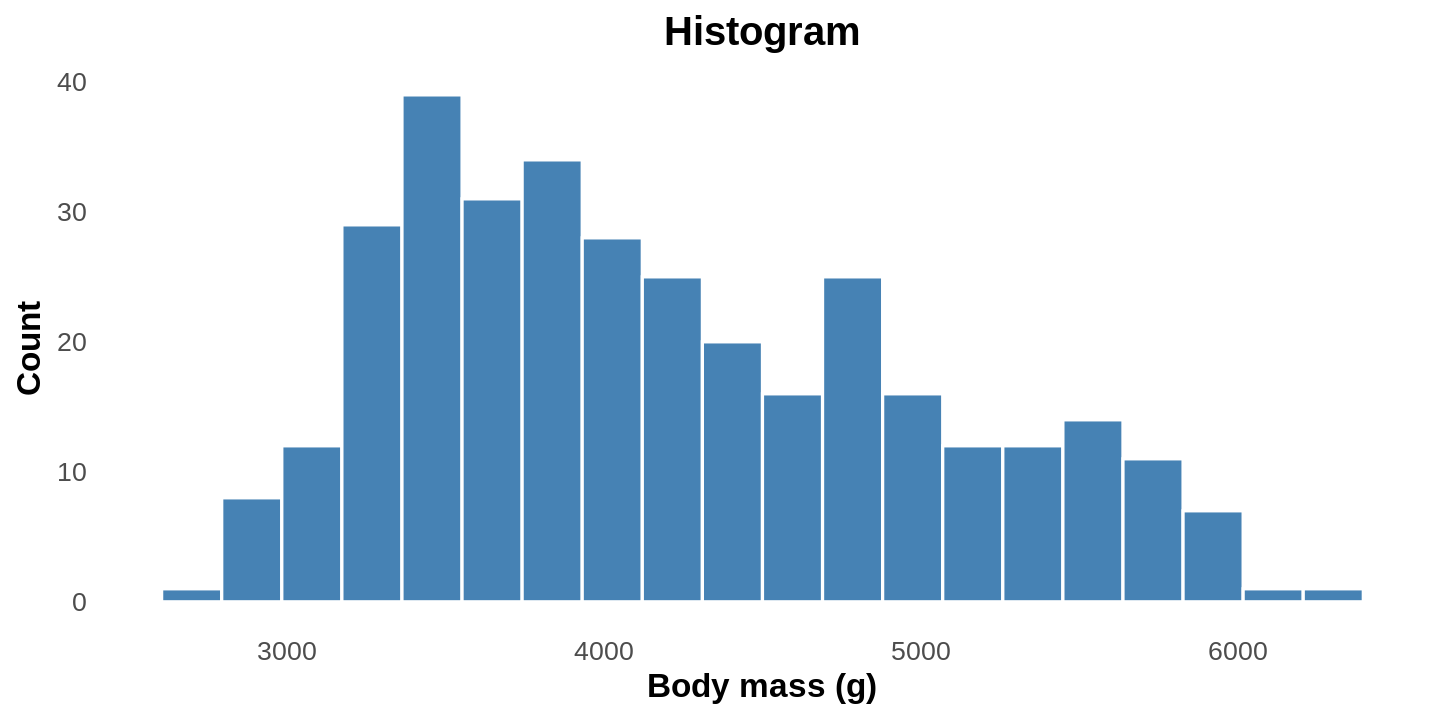

In [ ]:
# Distribution of body masses
ggplot(penguins, aes(x = body_mass_g)) +
  geom_histogram(
    bins = 20,             # number of bins
    fill = "steelblue",    # interior color of bars
    color = "white"        # bar borders
  ) +
  labs(
    title = "Histogram",
    x = "Body mass (g)", y = "Count"
  ) +
  my_clean_theme

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


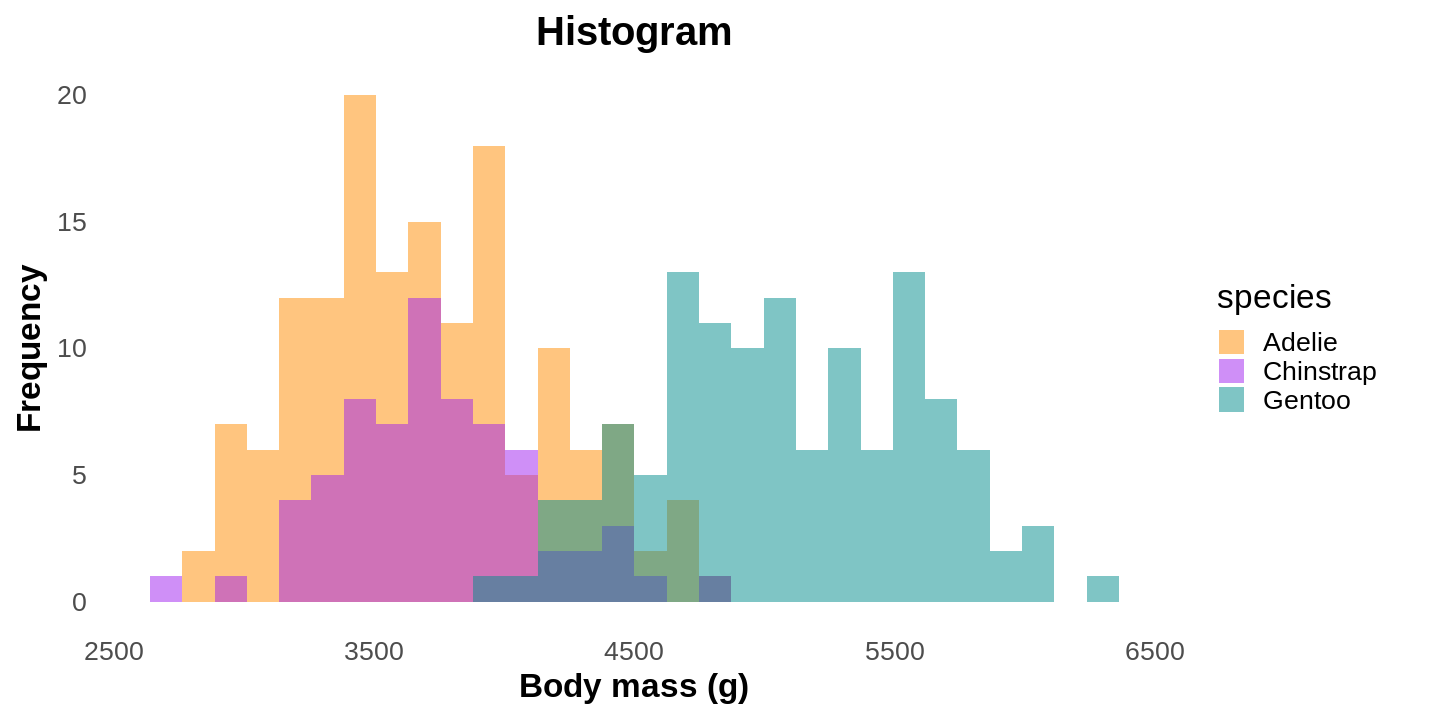

In [ ]:
# Body masses based on spieces
ggplot(data = penguins, aes(x = body_mass_g)) +
  geom_histogram(aes(fill = species),
                 alpha = 0.5,
                 position = "identity") +
  scale_fill_manual(values = c("darkorange","purple","cyan4")) +
  labs(x = "Body mass (g)",
       y = "Frequency",
       title = "Histogram") +
  my_clean_theme


#### Density Plot

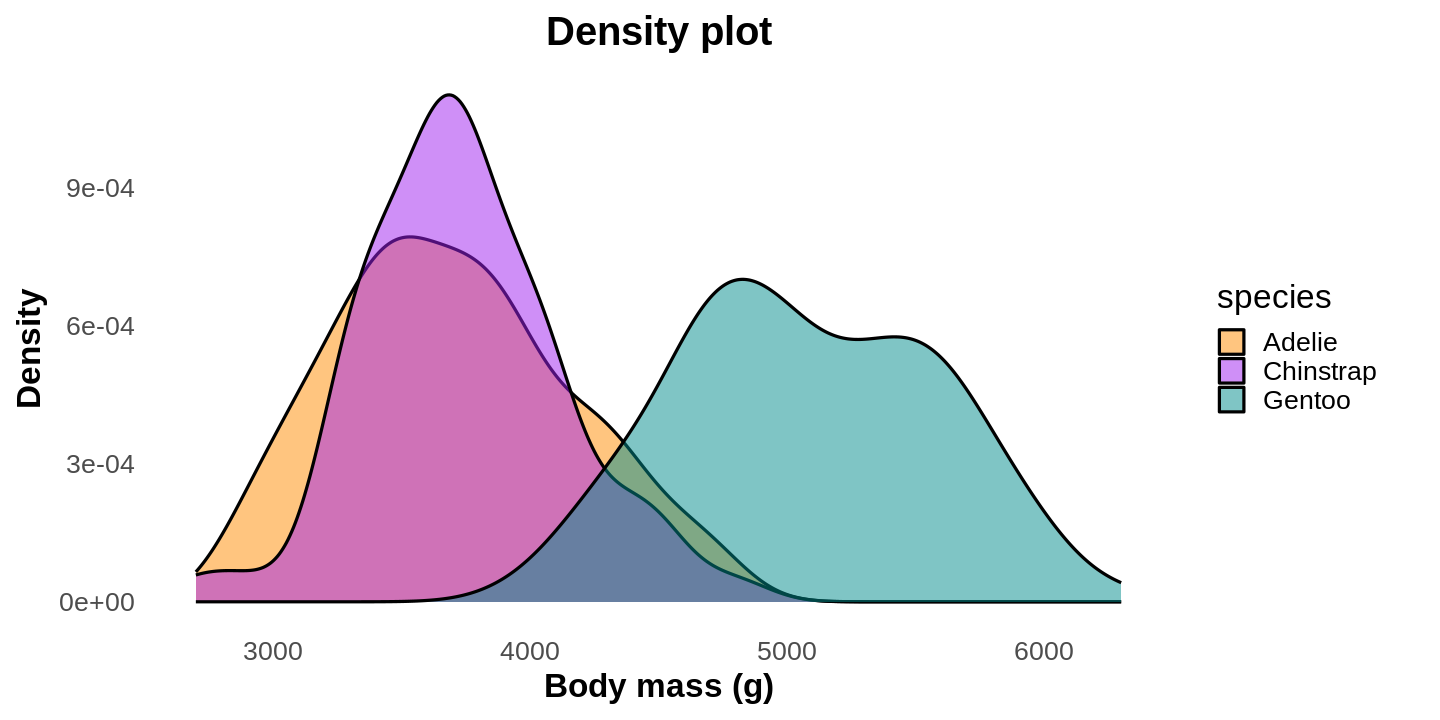

In [ ]:
# Body masses based on species (density plot version)
ggplot(data = penguins, aes(x = body_mass_g)) +
  geom_density(
    aes(fill = species),    # fill areas by species
    alpha = 0.5             # semi-transparent so overlaps are visible
  ) +
  scale_fill_manual(values = c("darkorange","purple","cyan4")) +
  labs(
    x = "Body mass (g)",
    y = "Density",          # density instead of raw counts
    title = "Density plot"
  ) +
  my_clean_theme


#### Bar Chart

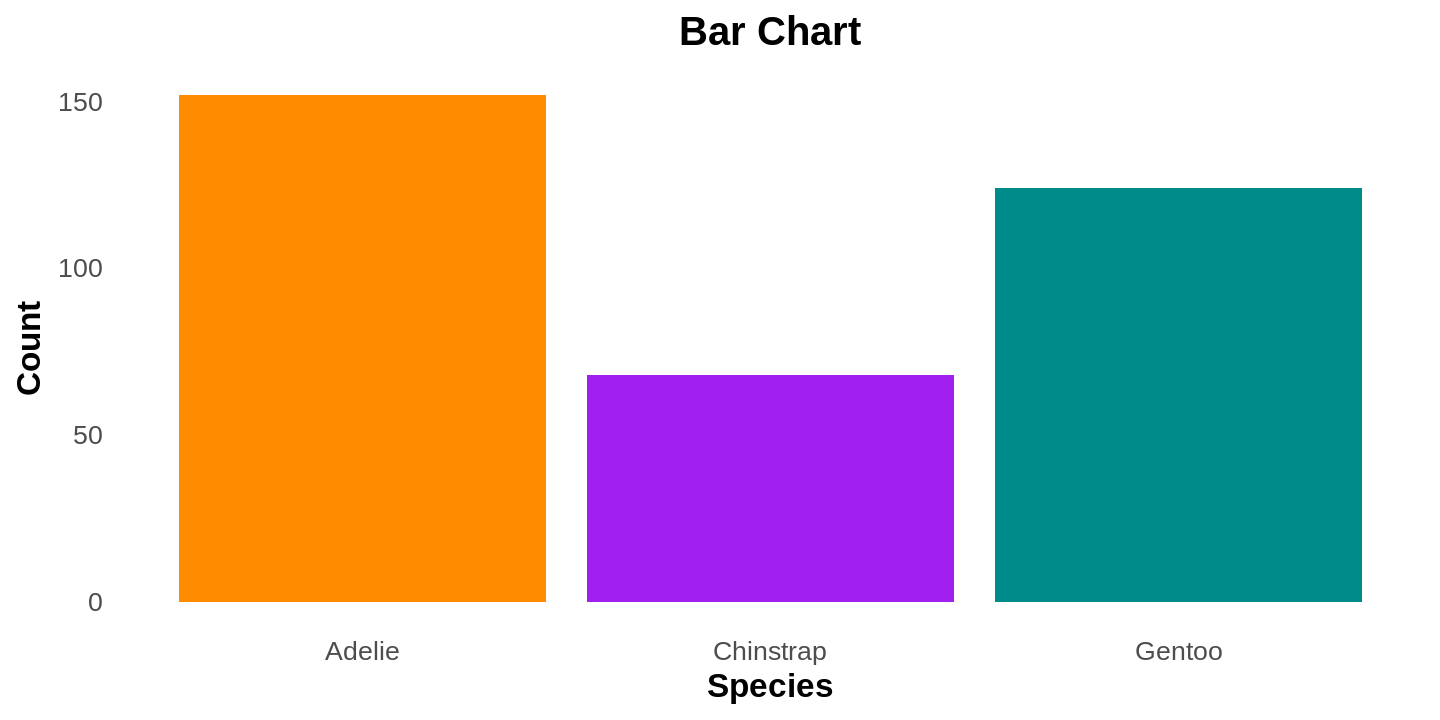

In [ ]:
# Count how many penguins per species
ggplot(penguins, aes(x = species)) +
  geom_bar(
    aes(fill = species),   # map category to fill for a legend
    show.legend = FALSE
  ) +
  scale_fill_manual(values = c("darkorange","purple","cyan4")) +
  labs(
    title = "Bar Chart",
    x = "Species", y = "Count"
  ) +
  my_clean_theme


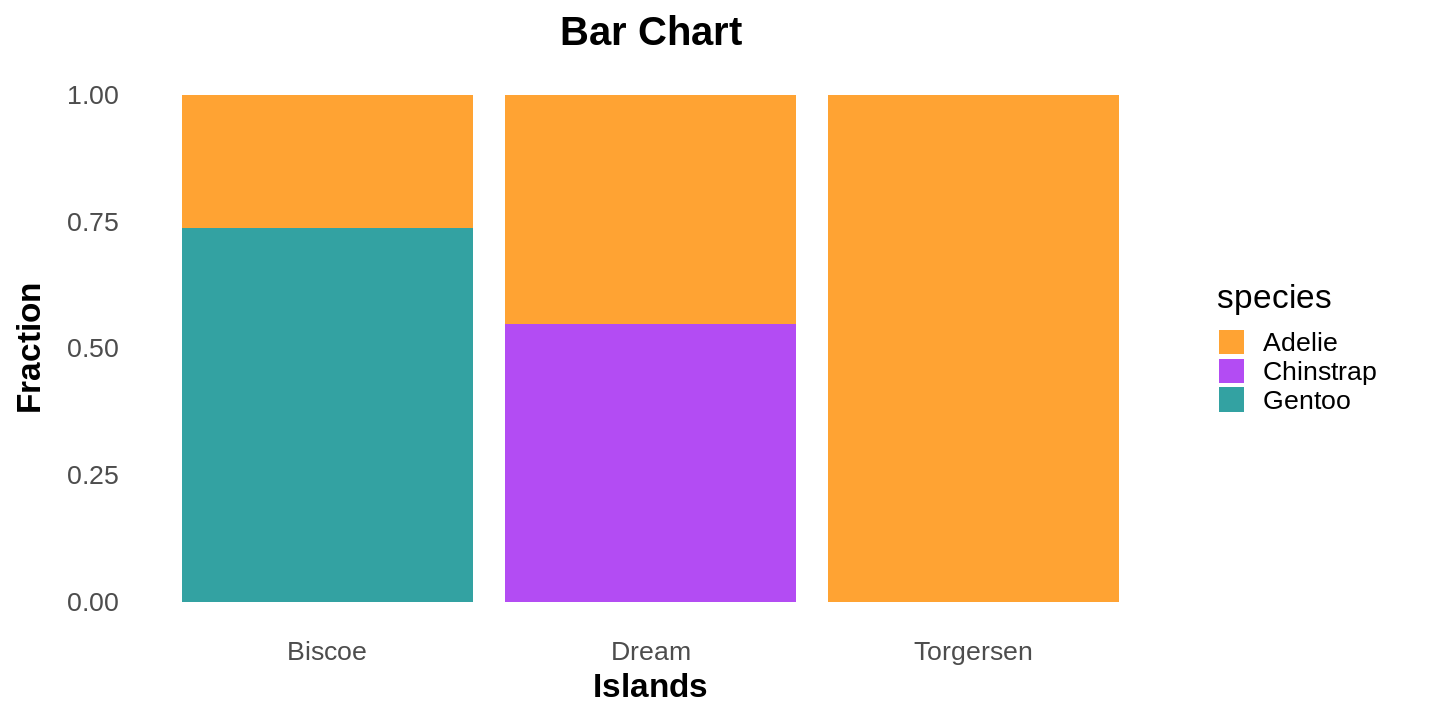

In [ ]:
# Bar chart of penguin species composition on each island
ggplot(penguins, aes(x = island, fill = species)) +
  geom_bar(
    position = "fill",   # stack bars and scale heights to 1 (shows proportions)
    alpha = 0.8
  ) +
  scale_fill_manual(values = c("darkorange","purple","cyan4")) +
  labs(
    title = "Bar Chart",
    x = "Islands",
    y = "Fraction"
  ) +
  my_clean_theme


> *Compare the two previous bar plots.*  
> When would you prefer the **first version**, and when the **second version**?



#### Scatterplot

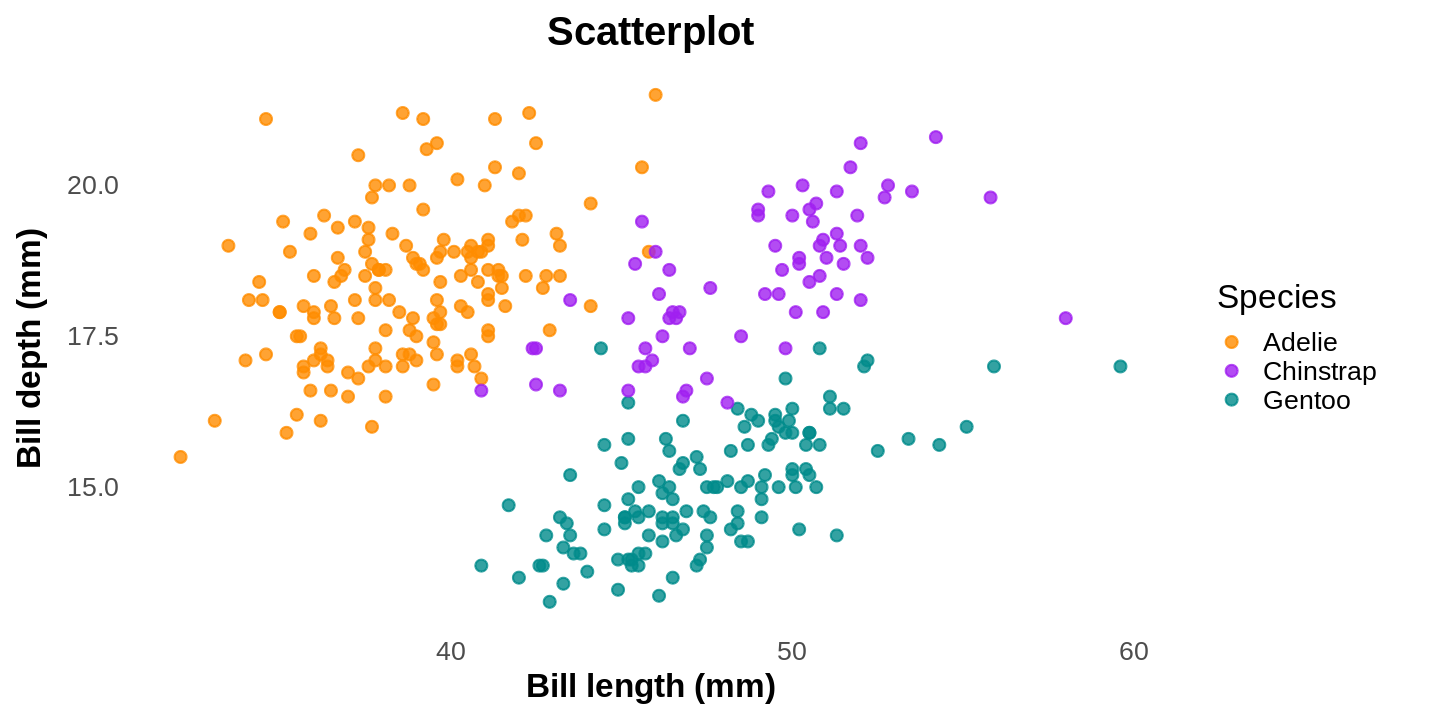

In [ ]:
# Relationship between bill length and bill depth
ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm)) +
  geom_point(aes(color = species), alpha = 0.8) +
  scale_color_manual(values = c("darkorange","purple","cyan4")) +
  labs(
    title = "Scatterplot",
    x = "Bill length (mm)", y = "Bill depth (mm)", color = "Species"
  ) +
  my_clean_theme


#### Boxplot

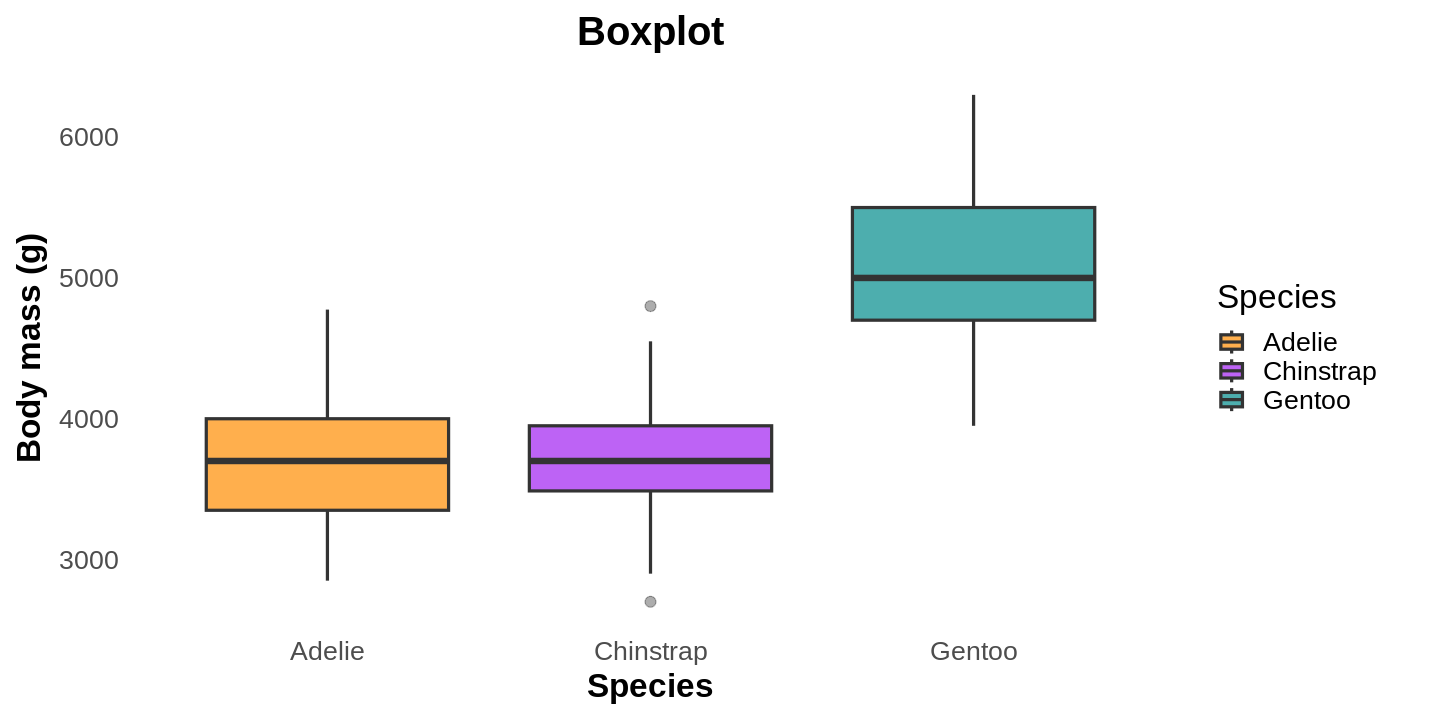

In [ ]:
ggplot(penguins, aes(x = species, y = body_mass_g)) +
  geom_boxplot(aes(fill = species), alpha = 0.7, outlier.alpha = 0.4) +
  scale_fill_manual(values = c("darkorange","purple","cyan4")) +
  labs(
    title = "Boxplot",
    x = "Species", y = "Body mass (g)", fill = "Species"
  ) +
  my_clean_theme

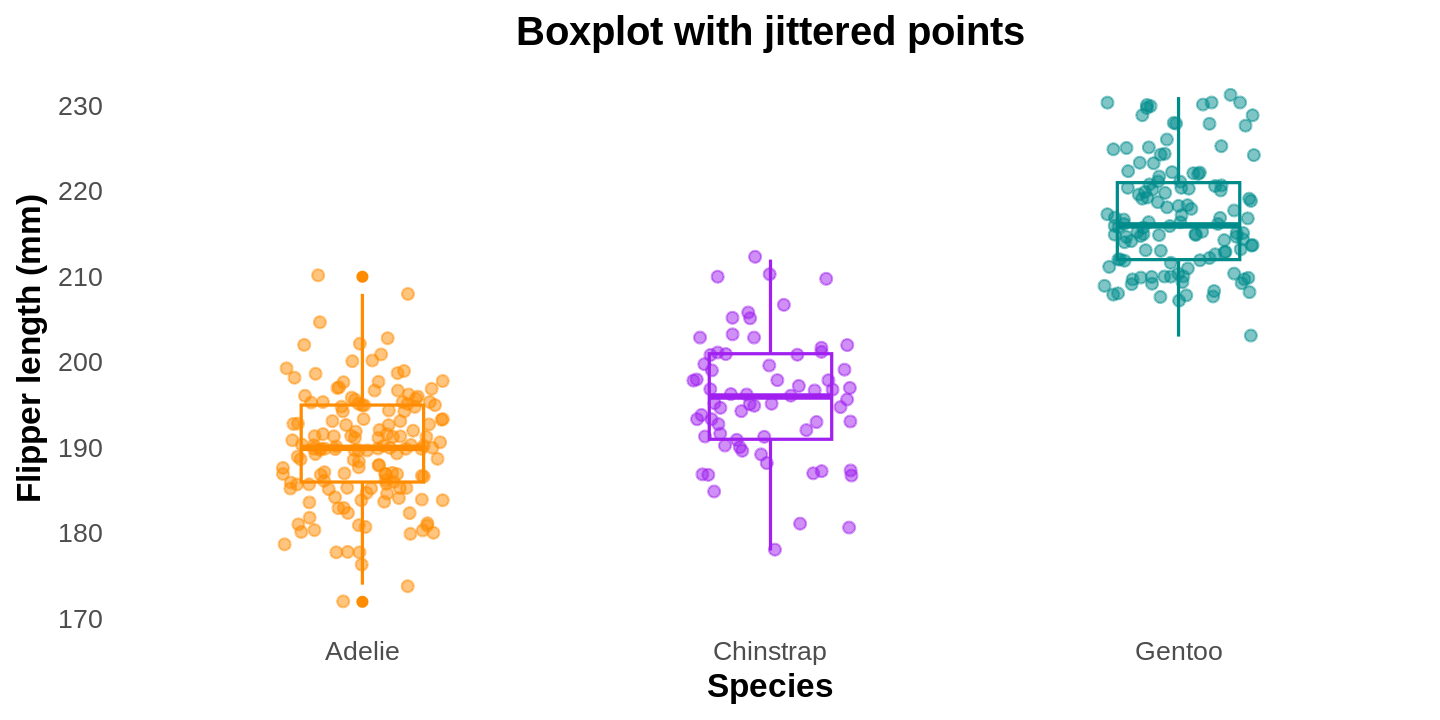

In [ ]:
# Boxplot of flipper lengths by species, with jittered points
ggplot(data = penguins, aes(x = species, y = flipper_length_mm)) +
  geom_boxplot(aes(color = species),
               width = 0.3, # make boxes narrower (less wide than default)
               show.legend = FALSE) + # remove legend for color (species is on x-axis already)
  geom_jitter(
    aes(color = species),   # color points by species
    alpha = 0.5,            # make points semi-transparent
    show.legend = FALSE,    # don’t repeat the color legend
    position = position_jitter(width = 0.2, seed = 0) # add small horizontal "jitter"
                                                       # to avoid exact overlaps;
                                                       # seed ensures reproducibility
  ) +
  scale_color_manual(values = c("darkorange","purple","cyan4")) +
  labs(
       title = "Boxplot with jittered points",
       x = "Species",
       y = "Flipper length (mm)") +
  my_clean_theme


#### Violin Plot

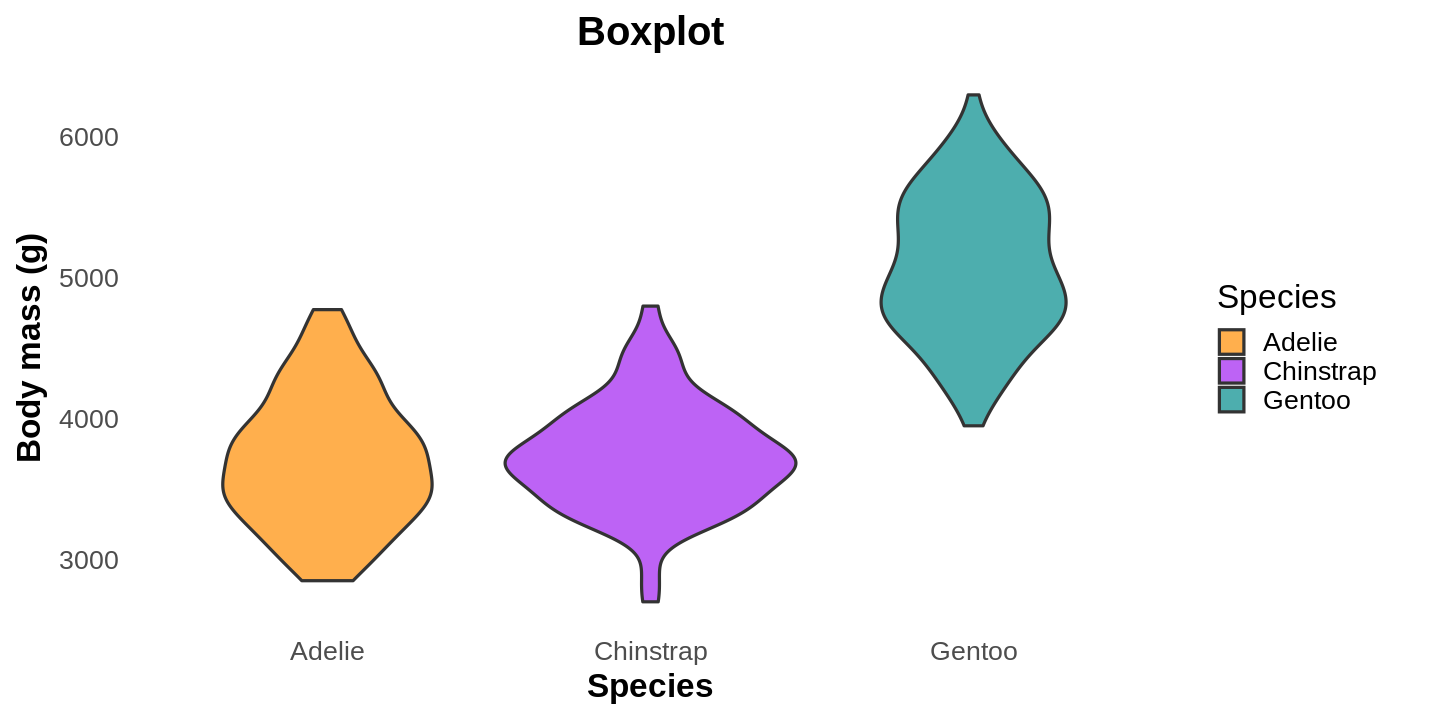

In [ ]:
ggplot(penguins, aes(x = species, y = body_mass_g)) +
  geom_violin(aes(fill = species), alpha = 0.7, outlier.alpha = 0.4) +
  scale_fill_manual(values = c("darkorange","purple","cyan4")) +
  labs(
    title = "Violin plot",
    x = "Species", y = "Body mass (g)", fill = "Species"
  ) +
  my_clean_theme

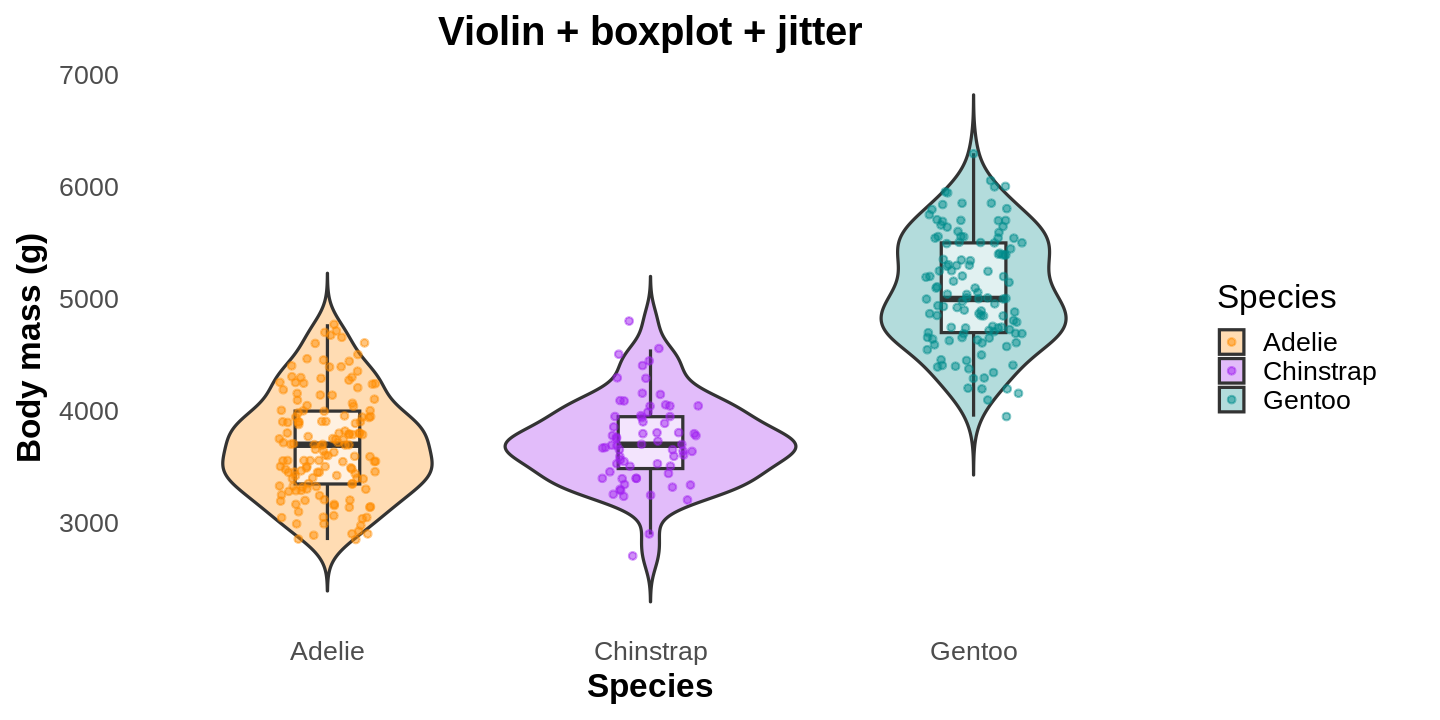

In [ ]:
# Violin + boxplot + jitter: full view of distributions
ggplot(penguins, aes(x = species, y = body_mass_g)) +
  geom_violin(
    aes(fill = species),    # fill violins by species
    alpha = 0.3,            # semi-transparent fill
    trim = FALSE            # don’t trim tails (show full distribution range)
  ) +
  geom_boxplot(
    width = 0.2,            # narrow box inside violin
    outlier.shape = NA,     # hide outliers (points shown separately below)
    alpha = 0.6             # slightly transparent so violin stays visible
  ) +
  geom_jitter(
    aes(color = species),   # jittered raw data points by species
    width = 0.15,           # control horizontal spread of jitter
    alpha = 0.5,            # transparency so overlaps are visible
    size = 1.5              # size of points
  ) +
  scale_fill_manual(values = c("darkorange","purple","cyan4")) +
  scale_color_manual(values = c("darkorange","purple","cyan4")) +
  labs(
    title = "Violin + boxplot + jitter",   # plot title
    x = "Species",
    y = "Body mass (g)",
    fill = "Species",
    color = "Species"
  ) +
  my_clean_theme


#### Line Plot
The raw dataset has individual penguins observed in years 2007–2009.
For a meaningful line, we’ll plot a summary (e.g., mean body mass per year), optionally split by species.

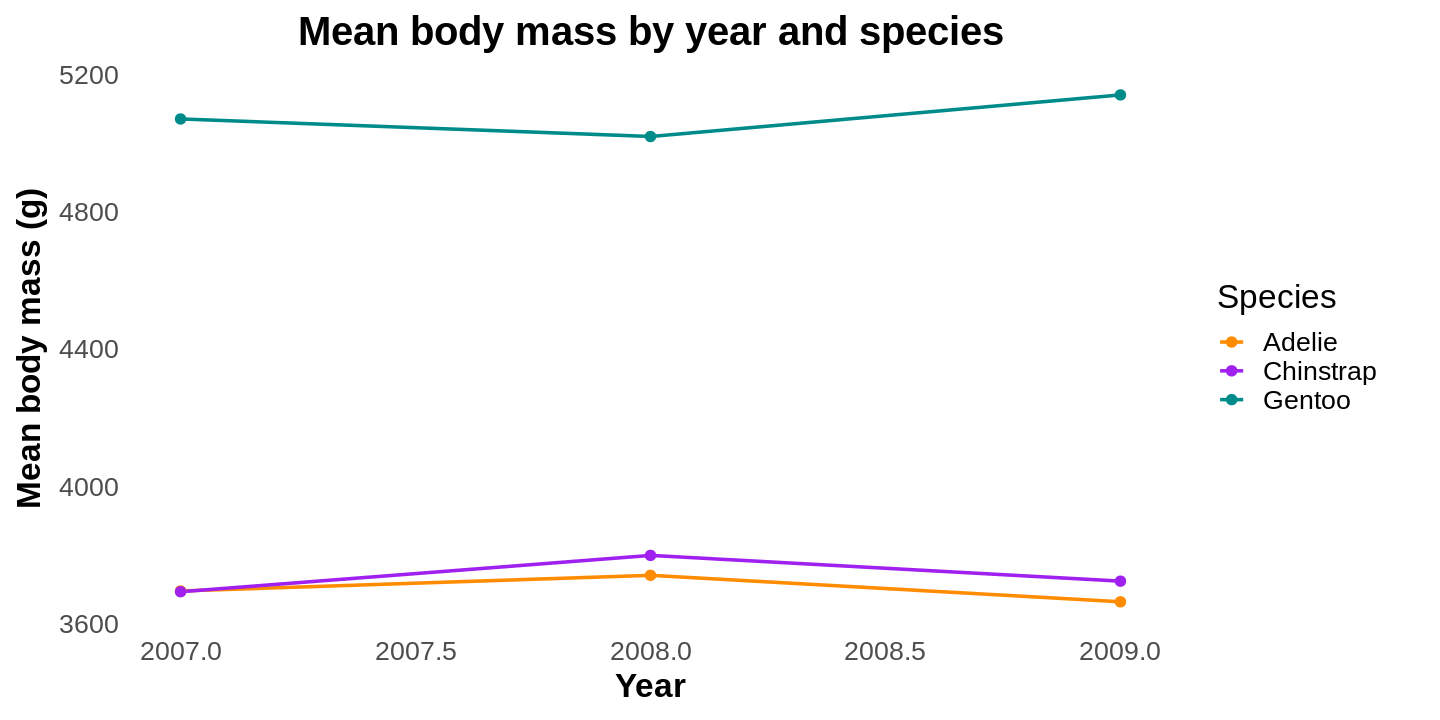

In [ ]:
# Compute mean body mass by year and species
annual_mass <- penguins %>%
  group_by(year, species) %>%
  summarise(
    mean_mass = mean(body_mass_g, na.rm = TRUE),
    .groups = "drop"
  )

# Line plot: mean body mass over years, per species
ggplot(annual_mass, aes(x = year, y = mean_mass, color = species)) +
  geom_line(size = 1) +                 # connect years per species
  geom_point(size = 2) +                # emphasize each year’s value
  scale_color_manual(values = c("darkorange","purple","cyan4")) +
  labs(
    title = "Mean body mass by year and species",
    x = "Year", y = "Mean body mass (g)", color = "Species"
  ) +
  my_clean_theme


### Changing Axis Scales (*x* and *y*)

In [Changing Colors](#changing_colors) we learned how to control the **color scale**.  
Similarly, we can (and often should) adjust the *x*/*y* axis scales. For example, we often need to customize:
- the axis **transform** (e.g., log, sqrt),
- the **limits** (range shown),
- the **breaks** (tick positions),
- the **labels** (tick text / formatting),


The general pattern is:

```r
scale_<aesthetic>_<scale_type>(...)
# e.g., scale_x_continuous(...), scale_y_continuous(...)
```

### <font color='gold'> Task 5 </font>  
**Make a meaningful plot** using the *penguins* dataset that tells a clear story.  
Use everything we’ve learned so far - and feel free to get inspiration from the internet (cite sources if you borrow ideas).

In [ ]:
# YOUR CODE HERE!

## Saving Figures

Use `ggsave()` to save a `ggplot2` figure. If you provide only a filename (with extension), the **most recent plot** is saved. If `width`/`height` are omitted, current device size is used.

In [ ]:
# Example (commented to avoid overwriting files):
# ggsave("figure.png", width = 7, height = 5, dpi = 300)


### <font color='gold'> Task 6 </font>  

Take the **plot you created in `Task 5`** (your own meaningful plot) and **save it to a file** on your computer using `ggsave()`.

**Requirements**
- Save as **PNG** (recommended for slides/web).  
- Specify a **custom width and height** (in inches).  
- Use a **high resolution** (`dpi = 300` or higher).  
- Give the file a clear and descriptive name (e.g., `"gentoo_flipper_mass.png"`).  

> *Hint:*
> If your plot object is named `p`, you can save it directly:
>
> ```r
> ggsave("gentoo_flipper_mass.png", plot = p, width = 8, height = 6, dpi = 300)
> ```

In [ ]:
# YOUR CODE HERE!